## Analysis of Funding Received by Start-ups in India from 2018 to 2021

# 1. Business Understanding

     1.1 Project Description

This is analysis project focuses on the funding received by start-ups in India from 2018 to 2021. The objective is to gain insights into the Indian start-up ecosystem and recommend the best action for our team's venture. By analyzing the data on funding amounts, start-up details, and investor information, we aim to uncover prevailing patterns and gain insights into the opportunities within India's start-up ecosystem to inform decision-making.

     1.2 Type of Problem

This project involves exploratory data analysis (EDA) and visualization. Our goal is to deduce hidden insights and patterns from the available data.


## 2. Data Understanding

We have collected data from various startups in India spanning the years 2018 to 2021, including information on the amounts they received in funding. By analyzing this data, we aim to gain a deeper insight into the startup ecosystem and identify the key contributing factors.


## 3. Data Assumptions

The amounts in the 2019 dataset are all in USD. Please note that the exchange rate for 2018 is \***\*1 USD = 70 INR**.


## 4. Data Analytics questions and Hypthesis


    5 SMART Analytics Questions:

1.  What is the overall trend in funding received by start-ups in India from 2018 to 2021?
2.  Which sectors have received the highest funding during this period?
3.  What is the distribution of startups across the cities in India?
4.  What is the average funding amount received by start-ups in India during this period?
5.  Hypotheses

Hypothesis 2

**Null Hypothesis (H₀):** There are no significant disparities in funding received by different sectors of Indian startups.

**Alternate Hypothesis (Ha):** The technology sector receives significantly higher funding compared to other industries.

Hypothesis 2

**Null Hypothesis (H₀):** The location of a startup in a particular city does not influence the amount of funding it receives.

**Alternate Hypothesis (Ha):** The location of a startup in a particular city significantly affects the amount of funding it receives.

    Hypotheses justifications

**Hypothesis 1:** The technology sector is often seen as a high-growth area with substantial investment potential, which may lead to higher funding.

**Hypothesis 2:** Certain cities might have more developed startup ecosystems, better infrastructure, and more active investment communities, which could impact funding amounts.

    Testing Methods

**For Hypothesis 1:** We will use statistical tests like t-tests to compare the average funding amounts across different sectors.

**For Hypothesis 2:** We will use statistical tests such regression analysis to analyze the funding amounts across different cities.


## 5. Data preparation


    5.1 Importing libraries


In [287]:

import os, sys
from sqlalchemy import create_engine
import pyodbc # Database Connectivity with  Open Database Connectivity (pyodbc)
from dotenv import dotenv_values # dotenv library to load environment variables

# Lib for data manipulation  analysis  
import pandas as pd
import numpy as np
import sklearn

from sklearn.impute import SimpleImputer

# lib for Vizualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy import stats
from prettytable import PrettyTable
# from matplotlib.ticker import FuncFormatter
import re # regular expressions.

import warnings
warnings.filterwarnings('ignore')

    5.2 Loading datasets


In [288]:
# Load environment variables from .env file 

environment_variables=dotenv_values('.env')
# Access login credentials from  the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")

In [289]:
#  Credection Connection tesr
connection = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [290]:
# connect to the server .

con = pyodbc.connect(connection)

In [291]:
# Load the dataset SQL query
query1 = "Select * from dbo.LP1_startup_funding2020"
query2 = "Select * from dbo.LP1_startup_funding2021"

# Read data from the  on dataset to the dataframe 
data_2018 = pd.read_csv('dataset\startup_funding2018.csv')
data_2019 = pd.read_csv('dataset\startup_funding2019.csv')
data_2020 = pd.read_sql(query1, con)
data_2021 = pd.read_sql(query2, con)

    5.2.1 Data Overview


In [292]:
# 2018 dataset 
data_2018.head(3)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India


In [293]:
# 2019 dataset 
data_2019.head(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding


In [294]:
# 2020 dataset 
data_2020.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None


In [295]:
# 2021 dataset 
data_2021.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D


Similarities of datasets


In [296]:
data_2018.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

In [297]:
data_2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [298]:
data_2020.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

In [299]:
data_2021.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

        5.3 Data Exploration


    5.3.1 2018 Data


5.3.1.1 Data Inspection


![Data 2018 Summary Image](Images\2018DataWrangler1.png)


In [300]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


Statistics summary of 2018 data


From the result summary

- 2018 Data has no Missing values
- columns are in string data type


5.3.1.2 Handling Missing values


start by checking Unique values in each column


In [301]:
def uniqueValue(data, column): #Industry, Round/Series,Amount, Location and Amount
    return data[column].value_counts()    

In [302]:
#Industry
uniqueValue(data_2018,'Industry')

Industry
—                                              30
Financial Services                             15
Education                                       8
Information Technology                          7
Health Care, Hospital                           5
                                               ..
Education, Gaming, Training                     1
Automotive, Search Engine, Service Industry     1
Wealth Management                               1
B2B, Farming, Marketplace                       1
Biotechnology, Health Care, Pharmaceutical      1
Name: count, Length: 405, dtype: int64

In [303]:
uniqueValue(data_2018,'Round/Series')

Round/Series
Seed                                                                                                       280
Series A                                                                                                    73
Angel                                                                                                       37
Venture - Series Unknown                                                                                    37
Series B                                                                                                    20
Series C                                                                                                    16
Debt Financing                                                                                              13
Private Equity                                                                                              10
Corporate Round                                                                                    

The Column has Incosistent data
Its have a int64 to be converted to string
and have Undisclosed, undisclosed


In [304]:
uniqueValue(data_2018,'Amount')

Amount
—              148
1000000         24
500000          13
2000000         12
₹50,000,000      9
              ... 
2200000          1
1200000          1
$15,000          1
$1,041,000       1
35000000         1
Name: count, Length: 198, dtype: int64

From this information we ave to assume that

- the amount with not current as USD Amount
- the Column Incosistent data, has comma, has 3 different current


In [305]:
uniqueValue(data_2018,'Location')

Location
Bangalore, Karnataka, India         102
Mumbai, Maharashtra, India           94
Bengaluru, Karnataka, India          55
Gurgaon, Haryana, India              52
New Delhi, Delhi, India              51
Pune, Maharashtra, India             20
Chennai, Tamil Nadu, India           19
Hyderabad, Andhra Pradesh, India     18
Delhi, Delhi, India                  16
Noida, Uttar Pradesh, India          15
Haryana, Haryana, India              11
Jaipur, Rajasthan, India              9
Ahmedabad, Gujarat, India             6
Kolkata, West Bengal, India           6
Bangalore City, Karnataka, India      5
Indore, Madhya Pradesh, India         4
India, Asia                           4
Kormangala, Karnataka, India          3
Ghaziabad, Uttar Pradesh, India       2
Kochi, Kerala, India                  2
Bhopal, Madhya Pradesh, India         2
Thane, Maharashtra, India             2
Jodhpur, Rajasthan, India             1
Powai, Assam, India                   1
Andheri, Maharashtra, India    

The location the is have inconsitent need to need to be cleaned


5.3.1.3 Data cleaning


    Check Duplications


In [306]:

data_2018.duplicated().value_counts()

False    525
True       1
Name: count, dtype: int64

Duplications


In [307]:
data_2018[data_2018.duplicated(keep=False)]

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


Dropping data duplicate


In [308]:
# Drop 2018 data duplicates
data_2018 = data_2018.drop_duplicates()

In [309]:
# double check the doublicates again 
data_2018.duplicated().value_counts()

False    525
Name: count, dtype: int64

No duplicate anymore in data 2018


Columns Data types


The `Amount` column is currently classified as a string data type, but it should be represented as an integer. Several issues in this column need to be addressed:

- **Character Removal:** The presence of `,`, `$`, and `₹` characters must be eliminated.
- **Null Values:** The `_` characters, indicating null values, need to be handled appropriately.
- **Currency Standardization:** Amounts in Indian Rupees will be converted to US Dollars to maintain a consistent currency standard.we need ti use our assumption 1 USD = 70rupee based on avarege exchange rate of 2018
- **Data Type Conversion:** Finally, the `Amount` column will be converted to a numeric data type.


In [310]:
# Remove ',' in amount
data_2018['Amount'].replace(',','', regex=True, inplace=True)
data_2018['Amount'].sample(5)

130    $540000000
398             —
510             —
19        ₹500000
222      ₹5000000
Name: Amount, dtype: object

In [311]:
# A function to convert amount to $ and clean the amount column
def convert_to_usd(amount):
    exchange_rate = 68.4  # Average exchange rate in 2018 to USD: 68.4113 INR.[https://www.exchangerates.org.uk/USD-INR-spot-exchange-rates-history-2018.html]

    if '₹' in str(amount):  #  if  amount is in INR
        amount = (str(amount).replace('₹', ''))  

        return pd.to_numeric(amount, errors='coerce' )/ exchange_rate

    elif '$' in str(amount):

        return  amount.replace('$','')

    elif "—" in str(amount):

        return None  
    else:
        return (amount)

pd.set_option('display.float_format', '{:.1f}'.format)
# Apply the conversion function to the 'Amount' column
data_2018["Amount"] = data_2018["Amount"].apply(convert_to_usd)



conventing the data to numeric


In [312]:
data_2018["Amount"]=data_2018["Amount"].astype(float)
data_2018["Amount"].dtype

dtype('float64')

In [313]:
data_2018['Amount'].isnull().sum()

148

In [314]:
#Imputing missing values
array= data_2018["Amount"].values.reshape(-1,1) #
imputer=SimpleImputer(strategy="median")
data_2018["Amount"]=imputer.fit_transform(array)

In [315]:
data_2018["Amount"].sample(5)


28     2000000.0
356   22514619.9
442    1300000.0
4      1300000.0
218     500000.0
Name: Amount, dtype: float64

In [316]:
data_2018['Amount'].isnull().sum()

0

Based on other data across other 3 datasets which will later make merging easier, `Location` and `Industry` columns will only remain with the first word.


In [317]:
data_2018["Location"].sample(10)

493        Haryana, Haryana, India
113    Bangalore, Karnataka, India
112     Chennai, Tamil Nadu, India
82         New Delhi, Delhi, India
364            Delhi, Delhi, India
404    Bangalore, Karnataka, India
406    Bangalore, Karnataka, India
137     Mumbai, Maharashtra, India
486        Gurgaon, Haryana, India
193        New Delhi, Delhi, India
Name: Location, dtype: object

In [318]:
# removing space and Capilize
data_2018["Location"] = data_2018["Location"].str.strip()
data_2018["Location"] = data_2018["Location"].str.title()

# split the address the Have multiple
data_2018["Location"] = data_2018["Location"].map(lambda x: x.split(',')[0])
data_2018["Location"].sample(10)


488    New Delhi
165       Mumbai
476    Bengaluru
43        Mumbai
341         Pune
220    Bangalore
0      Bangalore
150      Gurgaon
414    Bangalore
487    New Delhi
Name: Location, dtype: object

In [319]:
data_2018["Industry"].head(10)

0    Brand Marketing, Event Promotion, Marketing, S...
1                                 Agriculture, Farming
2     Credit, Financial Services, Lending, Marketplace
3                          Financial Services, FinTech
4                   E-Commerce Platforms, Retail, SaaS
5                     Cloud Infrastructure, PaaS, SaaS
6                       Internet, Leisure, Marketplace
7                                      Market Research
8         Information Services, Information Technology
9                                      Mobile Payments
Name: Industry, dtype: object

In [320]:
data_2018["Industry"] = data_2018["Industry"].map(lambda x: str(x).split(',')[0].strip() if pd.notnull(x) else x)

data_2018["Industry"].unique().tolist()

['Brand Marketing',
 'Agriculture',
 'Credit',
 'Financial Services',
 'E-Commerce Platforms',
 'Cloud Infrastructure',
 'Internet',
 'Market Research',
 'Information Services',
 'Mobile Payments',
 'B2B',
 'Apps',
 'Food Delivery',
 'Industrial Automation',
 'Automotive',
 'Finance',
 'Accounting',
 'Artificial Intelligence',
 'Internet of Things',
 'Air Transportation',
 'Food and Beverage',
 'Autonomous Vehicles',
 'Enterprise Software',
 'Logistics',
 'Insurance',
 'Information Technology',
 'Blockchain',
 'Education',
 'E-Commerce',
 'Renewable Energy',
 'E-Learning',
 'Clean Energy',
 'Transportation',
 'Fitness',
 'Hospitality',
 'Media and Entertainment',
 'Broadcasting',
 'EdTech',
 'Health Care',
 '—',
 'Sports',
 'Big Data',
 'Cloud Computing',
 'Food Processing',
 'Trading Platform',
 'Consumer Goods',
 'Wellness',
 'Fashion',
 'Consulting',
 'Biotechnology',
 'Communities',
 'Consumer',
 'Consumer Applications',
 'Mobile',
 'Advertising',
 'Marketplace',
 'Aerospace',
 'Ho

In [321]:
data_2018['Industry'] = data_2018['Industry'].replace('', np.nan)


In [322]:

def Industry_redistribution2018(Industry):
    if re.search(r'finance|credit|financial services|Funding Platform|accounting|insurance|blockchain|trading platform|crowdfunding|consumer lending|banking|wealth management|credit cards|fintech|fraud detection|cryptocurrency', Industry, re.IGNORECASE):
        return 'Finance'
    elif re.search(r'transport|automotive|air transport|logistics|autonomous vehicles|transportation|delivery|aerospace|electric vehicle|delivery service|last mile transportation', Industry, re.IGNORECASE):
        return 'Transport'
    elif re.search(r'technology|Enterprise Resource Planning (ERP)|it|File Sharing|Crowdsourcing|Battery|Computer|Android|Information Services|Enterprise Resource Planning (ERP)|artificial intelligence|cloud|internet|software|big data|iot|nanotechnology|embedded systems|smart cities|search engine|mobile|apps|cloud computing|saas|information technology|biotechnology|facilities support services|communities|hospitality|digital marketing|edtech|media and entertainment|internet of things|3d printing', Industry, re.IGNORECASE):
        return 'Technology'
    elif re.search(r'health|medical|hospital|biotechnology|biopharma|Child Care|health diagnostics|health insurance|alternative medicine|dental|medical device|veterinary|health care', Industry, re.IGNORECASE):
        return 'Healthcare'
    elif re.search(r'e-commerce|marketplace|retail|online portals|e-commerce platforms', Industry, re.IGNORECASE):
        return 'E-Commerce'
    elif re.search(r'education|e-learning|edtech|continuing education|children|career planning', Industry, re.IGNORECASE):
        return 'Education'
    elif re.search(r'entertainment|sports|fitness|Basketball|wellness|media|digital media|digital entertainment|gaming|online games|fantasy sports|music|music streaming|esports|audio|broadcasting|news|social media', Industry, re.IGNORECASE):
        return 'Entertainment'
    elif re.search(r'|digital media|marketing|brand marketing|Classifieds|digital marketing|advertising|market research', Industry, re.IGNORECASE):
        return 'Marketing'
    elif re.search(r'consumer|consumer goods|consumer applications|consumer electronics|fashion|cosmetics|shoes||wellness|fitness|dietary supplements|home decor|catering|cooking|hospitality|tourism|travel|rental|dating|events|wedding|cosmetics|eyewear|shopping|restaurants|food and beverage|food delivery|food processing|organic food|snack food|tea|food|beverage', Industry, re.IGNORECASE):
        return 'Consumer Services'
    elif re.search(r'industrial|manufacturing|industrial automation|facilities support services|cleantech|clean energy|renewable energy|packaging services|energy|3d printing|clean energy', Industry, re.IGNORECASE):
        return 'Industrial'
    elif re.search(r'agriculture|farming|agtech|farmers market|agriculture', Industry, re.IGNORECASE):
        return 'Agriculture'
    elif re.search(r'human resources|hr|training|customer service', Industry, re.IGNORECASE):
        return 'Human Resources'
    elif re.search(r'consulting|beauty|customer service|Cosmetics|Commercial|B2B|Collaboration|environmental consulting|business development|commercial real estate|business intelligence|outsourcing|analytics|business services|creative agency', Industry, re.IGNORECASE):
        return 'Business Services'
    elif re.search(r'legaltech|legal', Sector, re.IGNORECASE):
        return 'Justince'

    else:
        return Industry

# List of categories
categories = data_2018['Industry']
# Categorize each item in the list
categorized_items = {category: Industry_redistribution2018(category) for category in categories}

# Print categorized items
for item, category in categorized_items.items():
    print(f"{item}: {category}")


Brand Marketing: Marketing
Agriculture: Marketing
Credit: Finance
Financial Services: Finance
E-Commerce Platforms: E-Commerce
Cloud Infrastructure: Technology
Internet: Technology
Market Research: Marketing
Information Services: Technology
Mobile Payments: Technology
B2B: Marketing
Apps: Technology
Food Delivery: Transport
Industrial Automation: Marketing
Automotive: Transport
Finance: Finance
Accounting: Finance
Artificial Intelligence: Technology
Internet of Things: Technology
Air Transportation: Transport
Food and Beverage: Marketing
Autonomous Vehicles: Transport
Enterprise Software: Technology
Logistics: Transport
Insurance: Finance
Information Technology: Technology
Blockchain: Finance
Education: Education
E-Commerce: E-Commerce
Renewable Energy: Marketing
E-Learning: Education
Clean Energy: Marketing
Transportation: Transport
Fitness: Technology
Hospitality: Technology
Media and Entertainment: Technology
Broadcasting: Entertainment
EdTech: Technology
Health Care: Healthcare
—: 

In [323]:

# Apply the Industry_redistribution function to the 'Industry' column and update it
data_2018['Industry'] = data_2018['Industry'].apply(Industry_redistribution2018)

In [324]:
#replace '—' with null in data_2018['Industry']

# Replace '—' with NaN
data_2018['Industry'] = data_2018['Industry'].replace('—', np.nan)

# Replace empty strings with NaN
data_2018['Industry'] = data_2018['Industry'].replace('', np.nan)

the SimpleImputer with strategy='most_frequent'


In [325]:

imputer = SimpleImputer(strategy='most_frequent')
data_2018['Industry'] = imputer.fit_transform(data_2018[['Industry']]).ravel() # .ravel() is used to flatten the 2D array returned by fit_transform to a 1D array
imputer = SimpleImputer(strategy='most_frequent')
data_2018['Industry'] = imputer.fit_transform(data_2018[['Industry']]).ravel()

In [326]:
data_2018['Industry'].unique().tolist()

['Marketing',
 'Finance',
 'E-Commerce',
 'Technology',
 'Transport',
 'Education',
 'Entertainment',
 'Healthcare']

handle missing value


In [327]:
data_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

Missig value of 28% in column amount is a significant portion, let ` imputing with the median` which a practical approach that prevents data loss while providing a reasonable estimate.


In [328]:
# Statistics summary
data_2018['Amount'].describe().T

count          525.0
mean      13020215.9
std       66462609.1
min            877.2
25%         730994.2
50%        1300000.0
75%        3000000.0
max     1000000000.0
Name: Amount, dtype: float64

In [329]:
# impute null value by median 
# data_2018['Amount'].fillna(data_2018['Amount'].median(), inplace=True)
amount_invested = data_2018["Amount"].values.reshape(-1,1)

imputer = SimpleImputer(strategy="median")

data_2018["Amount"] = imputer.fit_transform(amount_invested)

In [330]:
data_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

To make merging and analysis easier, we will add a column called `Year Funded` that contains the year each startup received funding.


In [331]:
data_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,525.0,13020215.9,66462609.1,877.2,730994.2,1300000.0,3000000.0,1000000000.0


track the year od fundings by creating colum with 2018 as value


In [332]:
data_2018['Year Funded']= 2018

In [333]:
data_2018.sample(15)

,Company Name,Industry,Round/Series,Amount,Location,About Company,Year Funded
1,Happy Cow Dairy,Marketing,Seed,584795.3,Mumbai,A startup which aggregates milk from dairy far...,2018
293,Carmel Organics,Marketing,Series A,1300000.0,Indore,Carmel Organics is an India-based herb company...,2018
252,Kobster,E-Commerce,Seed,1300000.0,Chennai,Kobster is a pioneer of B2B eProcurement and a...,2018
97,LetsTransport,Transport,Series B,14619883.0,Bangalore,Lets transport is a logistics solution provider.,2018
329,arzooo.com,Marketing,Seed,219298.2,Bangalore,E-commerce website promising the best price on...,2018
142,Khabri,Technology,Seed,1300000.0,Haryana,Khabri is a digital audio platform for content...,2018
39,Kaleidofin,Finance,Seed,2800000.0,Chennai,A fintech platform.,2018
392,Spinny,E-Commerce,Series A,11000000.0,Gurgaon,Used cars marketplace in India. Ushering new e...,2018
69,Enakshi,Marketing,Seed,116959.1,Ahmedabad,Enakshi is an online apparel brand for women.,2018
185,PetSutra,Healthcare,Seed,138888.9,Gurgaon,Gurugram-based Online petcare platform.,2018


Data Summary after cleaning


![Data 2018 Summary Image](Images\2018DataWrangler2.png)


    5.3.2 2019 Data


![Data 2018 Summary Image](Images\2019beforeCleaning.png)


5.3.2.1 Data Inspection


In [334]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [335]:
data_2019.sample(15)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
71,Smart Institute,NaN,Surat,Edtech,A platform to learn online,NaN,HNI investors,"$1,500,000",NaN
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN
79,Zolostays,2015.0,NaN,Accomodation,It offers affordable housing apartments to you...,"Akhil Sikri, Nikhil Sikri, Sneha Choudhry",Trifecta Capital,"$7,000,000",NaN
72,CarDekho,2008.0,Jaipur,Automobile,Enables people to buy and sell new/old cars.,Amit Jain,"Ping An Global Voyager Fund, Hillhouse Capital...","$70,000,000",Series D
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,"$275,000,000",Series G
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN
74,Credr,2014.0,Mumbai,Automobile,A marketplace to buy and sell used bikes and s...,Mittal,"Omidyar Network, Eight Roads Ventures, GrowthS...","$6,000,000",NaN
83,Froogal,NaN,Hyderabad,Marketing & Customer loyalty,A cloud based Customer Loyalty & Engagement Pl...,"Jeevan Chowdary M, Harshit Harchani",US-based angel investors,"$1,000,000",Pre series A
37,Observe.AI,NaN,Bangalore,AI,Creates a voice AI platform,Swapnil,Scale Venture Partners,"$26,000,000",Series A
53,eJOHRI,2015.0,Mumbai,Jewellery,Omnichannel marketplace for gems and jewellery,"Jignesh Mehta, Shailen Mehta",Rajesh Ranavat,"$1,000,000",Pre series A


5.3.2.2 Data Inspection


Insight from above

- We have 87 Unique companies
- Most columns are string data type excpt Founded column
- We have missing values in Founded 29(33%), Headquarter 19(21%), Sector6(6%), Founders, Stage 46(52%)
- City with most startup in 2019 data is Bnagalore (24%), Mumbai (13%) and Delhi (11%), the missing Values is 21%
- From amount column undisclosed is having 13%


To speed up the data cleaning process, let uses d=function

1. For Descriptive statistics of a variable
2. For Data distribution of a variable (histogram)
3. For Check for missing values in a variable and ploting it


In [336]:
# To find descriptive statistics of ou data
def descriptive_statistics(variable):
    return variable.describe()

# To plot the data distribution of out data using a histogram
def plot_data_distribution(variable):
    plt.hist(variable)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()

# To check for missing values in a variable
def check_missing_values(variable):
    return variable.isnull().sum()

# To detect outliers
def detect_outliers(data, column):
    colors = sns.color_palette(['#FF9933', '#FFFFFF', '#138808'])
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
# ploting missing values 
def plot_missing_values_heatmap(df):
    # indicating missing values
    missing_values = df.isnull()

    colors = sns.color_palette(['#FF671F', '#FFFFFF', '#046A38'])  # Saffron, White, Green(Indian color) as am working with the data related to India
    # Plotting 
    sns.heatmap(missing_values, cmap=colors)
    plt.title('Missing Values Heatmap')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()
def check_unique_value_in_column(dataset, column):
    return dataset[column].unique().tolist() 

    

5.3.2.2 Unique values in eacah columns of data


In [337]:
check_unique_value_in_column(data_2019, 'Company/Brand')

['Bombay Shaving',
 'Ruangguru',
 'Eduisfun',
 'HomeLane',
 'Nu Genes',
 'FlytBase',
 'Finly',
 'Kratikal',
 'Quantiphi',
 'Lenskart',
 'Cub McPaws',
 'Appnomic',
 'Kaleidofin',
 'JobSquare',
 'Open Secret',
 'LivFin',
 "Byju's",
 'Zest Money',
 'Witblox',
 'Azah Personal Care Pvt. Ltd.',
 'SalaryFits',
 'Pristyn Care',
 'Springboard',
 'DROR Labs Pvt. Ltd',
 'Medlife',
 'Seekify',
 'Toffee Insurance',
 'Fireflies .ai',
 'HungerBox',
 'Bijak',
 'Licious',
 'truMe',
 'Pumpkart',
 'Asteria Aerospace',
 'Rivigo',
 'HappyEasyGo',
 'Zetwerk',
 'Observe.AI',
 'Freshokartz',
 'Lil’ Goodness and sCool meal',
 'Trell',
 'VMate',
 'Bombay Shirt Company',
 'Slintel',
 'MyGameMate',
 'Afinoz',
 'Rein Games',
 'Ecozen',
 'Box8',
 'Awign Enterprises',
 'Purplle',
 'Freightwalla',
 'TapChief',
 'eJOHRI',
 'Ninjacart',
 'Binca Games',
 'KredX',
 'm.Paani',
 'Origo',
 'WishADish',
 'Ecom Express',
 'Stanza Living',
 'PiBeam',
 'Euler Motors',
 'Moms Co',
 'Cubical Labs',
 'Lawyered',
 'Cuemath',
 'Nive

In [338]:
check_unique_value_in_column(data_2019, 'Founded')


[nan,
 2014.0,
 2004.0,
 2013.0,
 2010.0,
 2018.0,
 2019.0,
 2017.0,
 2011.0,
 2015.0,
 2016.0,
 2012.0,
 2008.0]

In [339]:
check_unique_value_in_column(data_2019, 'HeadQuarter')


[nan,
 'Mumbai',
 'Chennai',
 'Telangana',
 'Pune',
 'Bangalore',
 'Noida',
 'Delhi',
 'Ahmedabad',
 'Gurugram',
 'Haryana',
 'Chandigarh',
 'Jaipur',
 'New Delhi',
 'Surat',
 'Uttar pradesh',
 'Hyderabad',
 'Rajasthan']

In [340]:
check_unique_value_in_column(data_2019, 'Sector')


['Ecommerce',
 'Edtech',
 'Interior design',
 'AgriTech',
 'Technology',
 'SaaS',
 'AI & Tech',
 'E-commerce',
 'E-commerce & AR',
 'Fintech',
 'HR tech',
 'Food tech',
 'Health',
 'Healthcare',
 'Safety tech',
 'Pharmaceutical',
 'Insurance technology',
 'AI',
 'Foodtech',
 'Food',
 'IoT',
 'E-marketplace',
 'Robotics & AI',
 'Logistics',
 'Travel',
 'Manufacturing',
 'Food & Nutrition',
 'Social Media',
 nan,
 'E-Sports',
 'Cosmetics',
 'B2B',
 'Jewellery',
 'B2B Supply Chain',
 'Games',
 'Food & tech',
 'Accomodation',
 'Automotive tech',
 'Legal tech',
 'Mutual Funds',
 'Cybersecurity',
 'Automobile',
 'Sports',
 'Healthtech',
 'Yoga & wellness',
 'Virtual Banking',
 'Transportation',
 'Transport & Rentals',
 'Marketing & Customer loyalty',
 'Infratech',
 'Hospitality',
 'Automobile & Technology',
 'Banking']

In [341]:
check_unique_value_in_column(data_2019, 'Founders')



['Shantanu Deshpande',
 'Adamas Belva Syah Devara, Iman Usman.',
 'Jatin Solanki',
 'Srikanth Iyer, Rama Harinath',
 'Narayana Reddy Punyala',
 'Nitin Gupta',
 'Vivek AG, Veekshith C Rai',
 'Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa',
 'Renuka Ramnath',
 'Peyush Bansal, Amit Chaudhary, Sumeet Kapahi',
 'Abhay Bhat, Kinnar Shah',
 'D Padmanabhan',
 'Puneet Gupta, Sucharita Mukherjee',
 'Ishit Jethwa',
 'Ahana Gautam, Udit Kejriwal',
 'Rakesh Malhotra',
 'Byju Raveendran',
 'Chapman, Priya Sharma, Ashish Anantharaman',
 'Amit Modi',
 'Mohammed, Shashwat Diesh',
 'Renato Araujo',
 'Harsimarbir Singh, Dr Vaibhav Kapoor, Dr Garima Sawhney',
 'Gautam Tambay, Parul Gupta',
 'Dhiraj Naubhar, Dheeraj Bansal',
 'Tushar Kumar, Prashant Singh',
 'Arihant Jain, Ajeet Kushwaha',
 'Nishant Jain, Rohan Kumar',
 'Sam Udotong',
 'Sandipan Mitra, Uttam Kumar',
 'Nukul Upadhye, Mahesh Jakhotia, Jitender Bedwal, Daya Rai, Nikhil Tripathi',
 'Vivek Gupta, Abhay Hanjura',
 'Babu Dayal, Pramod Uniyal, L

In [342]:
check_unique_value_in_column(data_2019, 'Investor')



['Sixth Sense Ventures',
 'General Atlantic',
 'Deepak Parekh, Amitabh Bachchan, Piyush Pandey',
 'Evolvence India Fund (EIF), Pidilite Group, FJ Labs',
 'Innovation in Food and Agriculture (IFA)',
 'Undisclosed',
 'Social Capital, AngelList India, Gemba Capital, Omphalos Ventures,\xa0\xa091springboard via Atal Innovation Mission, Niti Aayog.',
 'Gilda VC, Art Venture, Rajeev Chitrabhanu.',
 'Multiples Alternate Asset Management',
 'SoftBank',
 'Venture Catalysts',
 'Avataar Ventures',
 'Oikocredit',
 'Titan Capital',
 'Matrix Partners',
 'German development finance institution DEG',
 'South Africa’s Naspers Ventures, the CPP Investment Board',
 'Goldman Sachs.',
 'Mumbai Angels Network',
 'Kunal Bahl, Rohit Bansal.',
 'Brazilian VC Fund Confrapar',
 'Sequoia India, Hummingbird Ventures, Greenoaks Capital, AngelList.',
 'Reach Capital',
 'Inflection Point Ventures',
 'Wilson Global Opportunities Fund',
 'Sequoia Capita',
 'IVM Intersurer',
 'Canaan Partners',
 'Paytm, Asian VC fund NPT

In [343]:
check_unique_value_in_column(data_2019, 'Amount($)')


['$6,300,000',
 '$150,000,000',
 '$28,000,000',
 '$30,000,000',
 '$6,000,000',
 'Undisclosed',
 '$1,000,000',
 '$20,000,000',
 '$275,000,000',
 '$22,000,000',
 '$5,000,000',
 '$140,500',
 '$540,000,000',
 '$15,000,000',
 '$182,700',
 '$12,000,000',
 '$11,000,000',
 '$15,500,000',
 '$1,500,000',
 '$5,500,000',
 '$2,500,000',
 '$140,000',
 '$230,000,000',
 '$49,400,000',
 '$32,000,000',
 '$26,000,000',
 '$150,000',
 '$400,000',
 '$2,000,000',
 '$100,000,000',
 '$8,000,000',
 '$100,000',
 '$50,000,000',
 '$120,000,000',
 '$4,000,000',
 '$6,800,000',
 '$36,000,000',
 '$5,700,000',
 '$25,000,000',
 '$600,000',
 '$70,000,000',
 '$60,000,000',
 '$220,000',
 '$2,800,000',
 '$2,100,000',
 '$7,000,000',
 '$311,000,000',
 '$4,800,000',
 '$693,000,000',
 '$33,000,000']

In [344]:
check_unique_value_in_column(data_2019, 'Stage')

[nan,
 'Series C',
 'Fresh funding',
 'Series D',
 'Pre series A',
 'Series A',
 'Series G',
 'Series B',
 'Post series A',
 'Seed funding',
 'Seed fund',
 'Series E',
 'Series F',
 'Series B+',
 'Seed round',
 'Pre-series A']

Missing Values (Indentifcation, Handling)


Visulazing the Null value in data


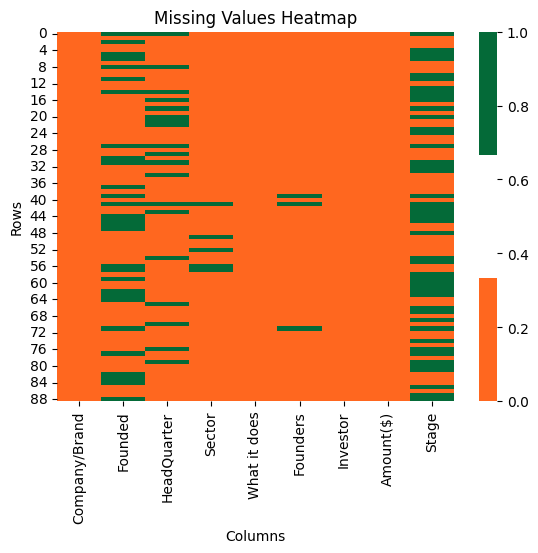

In [345]:
plot_missing_values_heatmap(data_2019)

The `Green` color is showing the missing value in dataset


    Unique values in some column we will use in analysis


Company column


In [346]:
# No missing Values found from the Vizualization

Founded column


In [347]:


# impute do  not work with datetime type, let make it numeric
array = data_2019['Founded'].values.reshape(-1,1)
imputer = SimpleImputer(strategy='most_frequent')
data_2019['Founded'] = imputer.fit_transform(array).ravel() # .ravel() is used to flatten the 2D array returned by fit_transform to a 1D array


In [348]:
data_2019['Founded'].isnull().sum()

0

Headqurter Columns


In [349]:
# Missing Values was found
check_missing_values(data_2019['HeadQuarter'])

19

Handling by replacing by imputing most frequency


In [350]:

imputer = SimpleImputer(strategy='most_frequent')
data_2019['HeadQuarter'] = imputer.fit_transform(data_2019[['HeadQuarter']]).ravel() # .ravel() is used to flatten the 2D array returned by fit_transform to a 1D array


In [351]:
check_missing_values(data_2019['HeadQuarter'])

0

Sector Column


In [352]:
data_2019["Sector"].unique().tolist()

['Ecommerce',
 'Edtech',
 'Interior design',
 'AgriTech',
 'Technology',
 'SaaS',
 'AI & Tech',
 'E-commerce',
 'E-commerce & AR',
 'Fintech',
 'HR tech',
 'Food tech',
 'Health',
 'Healthcare',
 'Safety tech',
 'Pharmaceutical',
 'Insurance technology',
 'AI',
 'Foodtech',
 'Food',
 'IoT',
 'E-marketplace',
 'Robotics & AI',
 'Logistics',
 'Travel',
 'Manufacturing',
 'Food & Nutrition',
 'Social Media',
 nan,
 'E-Sports',
 'Cosmetics',
 'B2B',
 'Jewellery',
 'B2B Supply Chain',
 'Games',
 'Food & tech',
 'Accomodation',
 'Automotive tech',
 'Legal tech',
 'Mutual Funds',
 'Cybersecurity',
 'Automobile',
 'Sports',
 'Healthtech',
 'Yoga & wellness',
 'Virtual Banking',
 'Transportation',
 'Transport & Rentals',
 'Marketing & Customer loyalty',
 'Infratech',
 'Hospitality',
 'Automobile & Technology',
 'Banking']

In [353]:
data_2019['Sector'].isnull().sum()

5

imputting missing values


In [354]:
imputer = SimpleImputer(strategy='most_frequent')
data_2019['Sector'] = imputer.fit_transform(data_2019[['Sector']]).ravel() # .ravel() is used to flatten the 2D array returned by fit_transform to a 1D array


In [355]:
check_missing_values(data_2019['Sector'])

0

This unique values in this column indicate the diverse sectors of service among the start-ups. For better analysis, we will group similar sectors into broader categories.


In [356]:

def Sector_redistribution2019(Sector):
    if re.search(r'Mutual Funds|finance|credit|financial services|Funding Platform|accounting|insurance|blockchain|trading platform|crowdfunding|consumer lending|banking|wealth management|credit cards|fintech|fraud detection|cryptocurrency', Sector, re.IGNORECASE):
        return 'Finance'
    elif re.search(r'transport|Travel|automotive|air transport|logistics|autonomous vehicles|transportation|delivery|aerospace|electric vehicle|delivery service|last mile transportation', Sector, re.IGNORECASE):
        return 'Transport'
    elif re.search(r'Safety tech|Infratech|technology|AI|AI & Tech|Robotics & AI|it|File Sharing|Crowdsourcing|Battery|Computer|Android|Information Services|Enterprise Resource Planning (ERP)|artificial intelligence|cloud|internet|software|big data|iot|nanotechnology|embedded systems|smart cities|search engine|mobile|apps|cloud computing|saas|information technology|biotechnology|internet of things|3d printing', Sector, re.IGNORECASE):
        return 'Technology'
    elif re.search(r'Pharmaceutical|health|medical|hospital|biotechnology|biopharma|Child Care|health diagnostics|health insurance|alternative medicine|dental|medical device|veterinary|health care', Sector, re.IGNORECASE):
        return 'Healthcare'
    elif re.search(r'Ecommerce|e-commerce|marketplace|retail|online portals|e-commerce platforms', Sector, re.IGNORECASE):
        return 'E-Commerce'
    elif re.search(r'education|e-learning|Edtech|edtech|continuing education|children|career planning', Sector, re.IGNORECASE):
        return 'Education'
    elif re.search(r'entertainment|Games|sports|fitness|Basketball|wellness|media|digital media|digital entertainment|gaming|online games|fantasy sports|music|music streaming|esports|audio|broadcasting|news|social media', Sector, re.IGNORECASE):
        return 'Entertainment'
    elif re.search(r'Marketing|marketing|brand marketing|Classifieds|digital marketing|advertising|market research', Sector, re.IGNORECASE):
        return 'Marketing'
    elif re.search(r'consumer|consumer goods|consumer applications|consumer electronics|fashion|cosmetics|shoes|beauty|wellness|fitness|dietary supplements|home decor|Jewellery|catering|cooking|hospitality|tourism|rental|dating|events|wedding|cosmetics|eyewear|shopping|restaurants|food and beverage|food delivery|food processing|organic food|snack food|tea|food|beverage', Sector, re.IGNORECASE):
        return 'Consumer Services'
    elif re.search(r'industrial|manufacturing|industrial automation|facilities support services|cleantech|clean energy|renewable energy|packaging services|energy|3d printing|clean energy', Sector, re.IGNORECASE):
        return 'Industrial'
    elif re.search(r'agriculture|farming|agtech|farmers market|agriculture', Sector, re.IGNORECASE):
        return 'Agriculture'
    elif re.search(r'human resources|Accomodation|hr|training|customer service', Sector, re.IGNORECASE):
        return 'Human Resources'
    elif re.search(r'consulting|customer service|Interior design|Commercial|B2B|Collaboration|environmental consulting|business development|commercial real estate|business intelligence|outsourcing|analytics|business services|creative agency', Sector, re.IGNORECASE):
        return 'Business Services'
    elif re.search(r'Legal tech|legaltech|legal', Sector, re.IGNORECASE):
        return 'Justince'

    else:
        return Sector

# List of categories
categories = data_2019['Sector'].astype(str)
# Categorize each item in the list
categorized_sector = {category: Sector_redistribution2019(category) for category in categories}

# Print categorized items
for item, category in categorized_sector.items():
    print(f"{item}: {category}")



Ecommerce: E-Commerce
Edtech: Education
Interior design: Business Services
AgriTech: Technology
Technology: Technology
SaaS: Technology
AI & Tech: Technology
E-commerce: E-Commerce
E-commerce & AR: E-Commerce
Fintech: Finance
HR tech: Human Resources
Food tech: Consumer Services
Health: Healthcare
Healthcare: Healthcare
Safety tech: Technology
Pharmaceutical: Healthcare
Insurance technology: Finance
AI: Technology
Foodtech: Consumer Services
Food: Consumer Services
IoT: Technology
E-marketplace: E-Commerce
Robotics & AI: Technology
Logistics: Transport
Travel: Transport
Manufacturing: Industrial
Food & Nutrition: Technology
Social Media: Entertainment
E-Sports: Entertainment
Cosmetics: Consumer Services
B2B: Business Services
Jewellery: Consumer Services
B2B Supply Chain: Technology
Games: Entertainment
Food & tech: Consumer Services
Accomodation: Human Resources
Automotive tech: Transport
Legal tech: Justince
Mutual Funds: Finance
Cybersecurity: Technology
Automobile: Technology
Sport

In [357]:
# Apply the Industry_redistribution function to the 'Industry' column and update it
data_2019['Sector'] = data_2019['Sector'].apply(Sector_redistribution2019)

In [358]:
data_2019["Sector"].unique().tolist()

['E-Commerce',
 'Education',
 'Business Services',
 'Technology',
 'Finance',
 'Human Resources',
 'Consumer Services',
 'Healthcare',
 'Transport',
 'Industrial',
 'Entertainment',
 'Justince',
 'Marketing']

In [359]:
data_2019.sample(15)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
16,Byju's,2011.0,Bangalore,Education,Provides online learning classes,Byju Raveendran,"South Africa’s Naspers Ventures, the CPP Inves...","$540,000,000",NaN
47,Ecozen,2015.0,Pune,Technology,It develops technology-enabled products to str...,"Devendra Gupta, Prateek Singhal, Vivek Pandey",Innovation in Food & Agriculture Fund (IFA Fund),"$6,000,000",Series A
82,Kratikal,2015.0,Uttar pradesh,Technology,Provides cyber security solutions,Pavan Kushwaha,"Gilda VC, Art Venture, Rajeev Chitrabhanu","$1,000,000",Pre-series A
2,Eduisfun,2015.0,Mumbai,Education,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
24,Medlife,2014.0,Bangalore,Healthcare,It solves inadequacies in the healthcare deliv...,"Tushar Kumar, Prashant Singh",Wilson Global Opportunities Fund,"$15,500,000",NaN
30,Licious,2015.0,Bangalore,Consumer Services,Online meat shop,"Vivek Gupta, Abhay Hanjura",Vertex Growth Fund,"$30,000,000",Series E
41,VMate,2015.0,Bangalore,Education,A short video platform,NaN,Alibaba,"$100,000,000",NaN
13,JobSquare,2019.0,Ahmedabad,Human Resources,Technology-based platform that is connecting s...,Ishit Jethwa,Titan Capital,"$140,500",NaN
22,Springboard,2013.0,Bangalore,Education,Offers online courses and extensive mentor-bas...,"Gautam Tambay, Parul Gupta",Reach Capital,"$11,000,000",Post series A
18,Witblox,2014.0,Bangalore,Education,Offers a range of robotics learning tools,Amit Modi,Mumbai Angels Network,"$182,700",NaN


Investor Column


In [360]:
data_2019["Investor"].unique().tolist()

['Sixth Sense Ventures',
 'General Atlantic',
 'Deepak Parekh, Amitabh Bachchan, Piyush Pandey',
 'Evolvence India Fund (EIF), Pidilite Group, FJ Labs',
 'Innovation in Food and Agriculture (IFA)',
 'Undisclosed',
 'Social Capital, AngelList India, Gemba Capital, Omphalos Ventures,\xa0\xa091springboard via Atal Innovation Mission, Niti Aayog.',
 'Gilda VC, Art Venture, Rajeev Chitrabhanu.',
 'Multiples Alternate Asset Management',
 'SoftBank',
 'Venture Catalysts',
 'Avataar Ventures',
 'Oikocredit',
 'Titan Capital',
 'Matrix Partners',
 'German development finance institution DEG',
 'South Africa’s Naspers Ventures, the CPP Investment Board',
 'Goldman Sachs.',
 'Mumbai Angels Network',
 'Kunal Bahl, Rohit Bansal.',
 'Brazilian VC Fund Confrapar',
 'Sequoia India, Hummingbird Ventures, Greenoaks Capital, AngelList.',
 'Reach Capital',
 'Inflection Point Ventures',
 'Wilson Global Opportunities Fund',
 'Sequoia Capita',
 'IVM Intersurer',
 'Canaan Partners',
 'Paytm, Asian VC fund NPT

In [361]:
data_2019["Investor"].dtype

dtype('O')

Amount column


Exploring unique value to understand what i need to clean


In [362]:
data_2019['Amount($)'].unique().tolist()

['$6,300,000',
 '$150,000,000',
 '$28,000,000',
 '$30,000,000',
 '$6,000,000',
 'Undisclosed',
 '$1,000,000',
 '$20,000,000',
 '$275,000,000',
 '$22,000,000',
 '$5,000,000',
 '$140,500',
 '$540,000,000',
 '$15,000,000',
 '$182,700',
 '$12,000,000',
 '$11,000,000',
 '$15,500,000',
 '$1,500,000',
 '$5,500,000',
 '$2,500,000',
 '$140,000',
 '$230,000,000',
 '$49,400,000',
 '$32,000,000',
 '$26,000,000',
 '$150,000',
 '$400,000',
 '$2,000,000',
 '$100,000,000',
 '$8,000,000',
 '$100,000',
 '$50,000,000',
 '$120,000,000',
 '$4,000,000',
 '$6,800,000',
 '$36,000,000',
 '$5,700,000',
 '$25,000,000',
 '$600,000',
 '$70,000,000',
 '$60,000,000',
 '$220,000',
 '$2,800,000',
 '$2,100,000',
 '$7,000,000',
 '$311,000,000',
 '$4,800,000',
 '$693,000,000',
 '$33,000,000']

From the summary wher saw that 13% is undisclosed


In [363]:
data_2019['Amount($)'].describe()

count              89
unique             50
top       Undisclosed
freq               12
Name: Amount($), dtype: object

remove $ in amount and converst dtype to numeric


In [364]:

data_2019['Amount($)'] = data_2019['Amount($)'].str.replace('$','').replace(',', '', regex=True)
data_2019['Amount($)'] = pd.to_numeric(data_2019['Amount($)'], errors='coerce')

In [365]:

data_2019['Amount($)'] = data_2019['Amount($)'].replace('Undisclosed', np.nan)

Handle missing values


In [366]:

# handle missing value by imputting median strategy
imputer = SimpleImputer(strategy ='median') 
data_2019['Amount($)'] = imputer.fit_transform(data_2019[['Amount($)']])

In [367]:
check_missing_values(data_2019['Amount($)'])

0

detecting and handling the Outlier


handhle Ourtliers


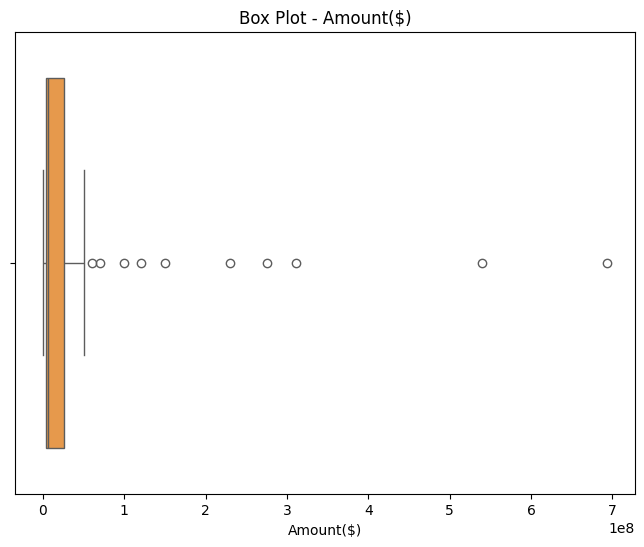

In [368]:
# Box Plot to visualize outliers

plt.figure(figsize=(8, 6))
sns.boxplot(x=data_2019['Amount($)'], color='#FF9933')
plt.title('Box Plot - Amount($)')
plt.xlabel('Amount($)')
plt.show()

In [369]:
detect_outliers(data_2019, 'Amount($)')

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1,Ruangguru,2014.0,Mumbai,Education,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C
9,Lenskart,2010.0,Delhi,E-Commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,275000000.0,Series G
16,Byju's,2011.0,Bangalore,Education,Provides online learning classes,Byju Raveendran,"South Africa’s Naspers Ventures, the CPP Inves...",540000000.0,NaN
33,Asteria Aerospace,2011.0,Bangalore,Technology,"Develops drones that are used by the military,...","Neel Mehta, Nihar Vartak",Reliance Industries,230000000.0,NaN
41,VMate,2015.0,Bangalore,Education,A short video platform,NaN,Alibaba,100000000.0,NaN
48,Box8,2011.0,Mumbai,Consumer Services,Enables to order food online,"Amit Raj, Anshul Gupta",Trifecta Capital,120000000.0,NaN
72,CarDekho,2008.0,Jaipur,Technology,Enables people to buy and sell new/old cars.,Amit Jain,"Ping An Global Voyager Fund, Hillhouse Capital...",70000000.0,Series D
73,Shadowfax,2015.0,Bangalore,Transport,A platform for delivery services,"Abhishek Bansal, Vaibhav Khandelwal","Flipkart, Eight Roads Ventures, NGP Capital, Q...",60000000.0,Series D
80,Ola,2010.0,Bangalore,Transport,It enables one to book cab online,"Bhavish Aggarwal, Ankit Bhati","Kia Motors, Hyundai",311000000.0,NaN
85,Oyo,2013.0,Gurugram,Technology,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...",693000000.0,NaN


I have decise to keep the outliers as its the most amount can be received by a startup, in case a start received multiple Investments


Stage column


In [370]:
data_2019["Stage"].value_counts()

Stage
Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: count, dtype: int64

In [371]:
#cleaning Funding round names as categorized based similarity
categorized_stage = {
    "Fresh funding" :"Seed",
    "Seed funding":"Seed",
    "Seed fund" :"Seed",
    "Pre series A": "Pre-series A",
    "Series B+" : "Series B",
    "Seed round" :"Seed"}
data_2019['Stage'] = data_2019['Stage'].replace(categorized_stage)

In [372]:
data_2019["Stage"].value_counts()

Stage
Series A         10
Pre-series A      9
Series B          9
Seed              4
Series D          4
Series C          3
Series G          1
Post series A     1
Series E          1
Series F          1
Name: count, dtype: int64

Handle Missing Value


the From the Viz, whe notice the missing value


In [373]:
check_missing_values(data_2019['Stage'])

46

In [374]:
imputer = SimpleImputer(strategy='most_frequent')
data_2019['Stage'] = imputer.fit_transform(data_2019[['Stage']]).ravel() # .ravel() is used to flatten the 2D array returned by fit_transform to a 1D array


In [375]:
check_missing_values(data_2019['Stage'])

0

handle the missing value for the Founders columns


In [376]:
check_missing_values(data_2019['Founders'])

3

In [377]:

imputer = SimpleImputer(strategy='most_frequent')
data_2019['Founders'] = imputer.fit_transform(data_2019[['Founders']]).ravel() # .ravel() is used to flatten the 2D array returned by fit_transform to a 1D array


In [378]:
check_missing_values(data_2019['Founders'])

0

In [379]:
data_2019['Year Funded'] = 2019

Visualiza again the missing values


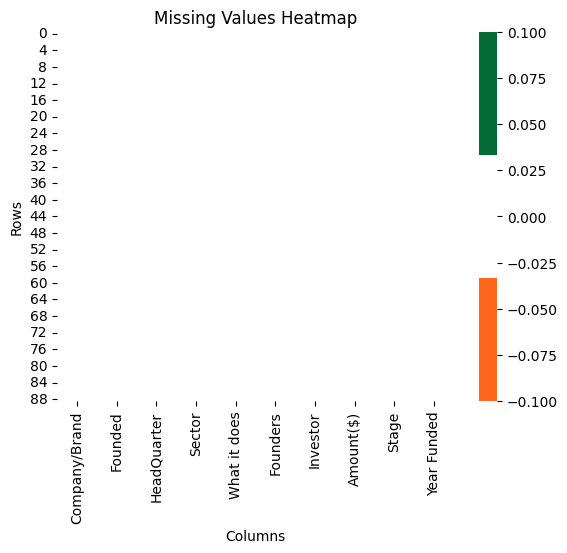

In [380]:
plot_missing_values_heatmap(data_2019)

No Duplication was found


    5.3.3 Data 2020


![Data 2020 Summary Image](Images\2020beforeCleaning.png)


In [381]:
data_2020.sample(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
246,Harmonizer India,2019.0,Bangalore,Tech Startup,Energy-efficient solutions based on the Artifi...,M R Srinivas,Kapil Dev,NaN,None,None
454,SOAL,2017.0,Mumbai,EdTech,A skill-tank nurturing students into disruptiv...,"Pratik Agarwal, Raj Desai, Varsha Bhambhani","Krishnan Menon, Srinivas Kollipara",1000000.0,Series A-1,None
226,SUGAR cosmetics,2012.0,Mumbai,Cosmetics,It is a cruelty-free makeup brand providing co...,"Kasuhik Mukherjee, Vineeta Singh","A91 Partners, RB Investments Pte. Ltd",2000000.0,Debt,None


Duplicates


In [382]:
data_2020= data_2020.drop_duplicates()

dropping column10, is 99% missing values


In [383]:
data_2020= data_2020.drop(['column10'], axis=1)

Missing values


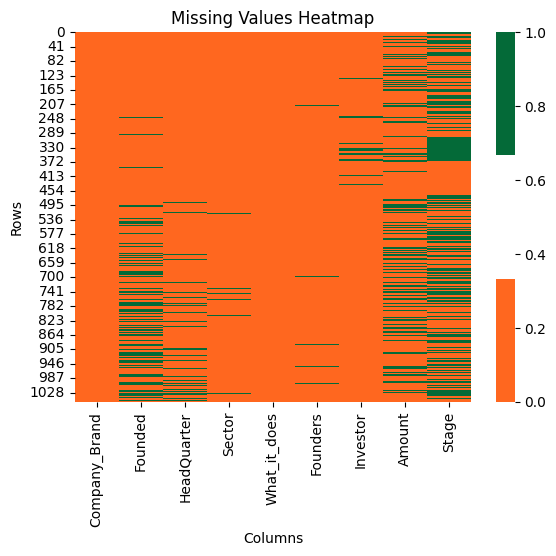

In [384]:
plot_missing_values_heatmap(data_2020)

Founded column


In [385]:
data_2020['Founders'].dtype

dtype('O')

In [386]:
# Replace None (or NaN) with most_frequent

most_frequent = data_2020['Founders'].mode()[0]

# Replace None (or NaN) with the most frequent value
data_2020['Founders'] = data_2020['Founders'].replace({None: most_frequent, np.nan: most_frequent})



In [387]:
check_missing_values(data_2020['Founders'])

0

headQuarter


In [388]:
check_unique_value_in_column(data_2020,'HeadQuarter')


['Chennai',
 'Bangalore',
 'Pune',
 'New Delhi',
 'Indore',
 'Hyderabad',
 'Gurgaon',
 'Belgaum',
 'Noida',
 'Mumbai',
 'Andheri',
 'Jaipur',
 'Ahmedabad',
 'Kolkata',
 'Tirunelveli, Tamilnadu',
 'Thane',
 None,
 'Singapore',
 'Gurugram',
 'Gujarat',
 'Haryana',
 'Kerala',
 'Jodhpur',
 'Jaipur, Rajastan',
 'Delhi',
 'Frisco, Texas, United States',
 'California',
 'Dhingsara, Haryana',
 'New York, United States',
 'Patna',
 'San Francisco, California, United States',
 'San Francisco, United States',
 'San Ramon, California',
 'Paris, Ile-de-France, France',
 'Plano, Texas, United States',
 'Sydney',
 'San Francisco Bay Area, Silicon Valley, West Coast',
 'Bangaldesh',
 'London, England, United Kingdom',
 'Sydney, New South Wales, Australia',
 'Milano, Lombardia, Italy',
 'Palmwoods, Queensland, Australia',
 'France',
 'San Francisco Bay Area, West Coast, Western US',
 'Trivandrum, Kerala, India',
 'Cochin',
 'Samastipur, Bihar',
 'Irvine, California, United States',
 'Tumkur, Karnataka'

In [389]:
data_2020['HeadQuarter'].value_counts()

HeadQuarter
Bangalore                                                   316
Mumbai                                                      164
Gurugram                                                     79
Delhi                                                        62
Chennai                                                      43
                                                           ... 
Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom      1
Shanghai, China                                               1
Jiaxing, Zhejiang, China                                      1
Rajastan                                                      1
Sydney, New South Wales, Australia                            1
Name: count, Length: 77, dtype: int64

In [390]:

most_frequent = data_2020['HeadQuarter'].mode()[0]
# Replace None (or NaN) with the most frequent value
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].replace({None: most_frequent, np.nan: most_frequent})

In [391]:
check_missing_values(data_2020['HeadQuarter'])

0

In [392]:
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].map(lambda x: x.split(',')[0] if x is not None else x)

From this I can see the headquarter the located outside India, So group them in Outside India category


In [393]:
#  addresses to be mapped to "Outside India"
outside_india_addresses = [
    'San Francisco, California, United States',
    'London, England, United Kingdom',
    'San Francisco Bay Area, Silicon Valley, West Coast',
    'New York, United States',
    'San Francisco, United States',
    'Tangerang, Jawa Barat, Indonesia',
    'San Ramon, California ',
    'Frisco, Texas, United States ',
    'Paris, Ile-de-France, France',
    'Plano, Texas, United States',
    'Palmwoods, Queensland, Australia',
    'France',
    'San Ramon, California',
    'San Francisco Bay Area, West Coast, Western US',
    'Irvine, California, United States',
    'Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom',
    'Shanghai, China',
    'Jiaxing, Zhejiang, China',
    'Sydney, New South Wales, Australia',
    'California',
    'Singapore',
    'San Francisco',
    'San Franciscao',
    'Sydney',
    'Bangaldesh',
    'Frisco, Texas, United States',
    'New York',
    'Bangkok',
    'Seattle',
    'Milano, Lombardia, Italy',
    'Seoul',
    'Berlin'
]

for address in outside_india_addresses:
    data_2020.loc[data_2020['HeadQuarter'] == address, 'HeadQuarter'] = 'Outside India'


In [394]:
data_2020['HeadQuarter'].unique().tolist()

['Chennai',
 'Bangalore',
 'Pune',
 'New Delhi',
 'Indore',
 'Hyderabad',
 'Gurgaon',
 'Belgaum',
 'Noida',
 'Mumbai',
 'Andheri',
 'Jaipur',
 'Ahmedabad',
 'Kolkata',
 'Tirunelveli',
 'Thane',
 'Outside India',
 'Gurugram',
 'Gujarat',
 'Haryana',
 'Kerala',
 'Jodhpur',
 'Delhi',
 'Frisco',
 'Dhingsara',
 'Patna',
 'San Ramon',
 'Paris',
 'Plano',
 'San Francisco Bay Area',
 'London',
 'Milano',
 'Palmwoods',
 'Trivandrum',
 'Cochin',
 'Samastipur',
 'Irvine',
 'Tumkur',
 'Newcastle Upon Tyne',
 'Shanghai',
 'Jiaxing',
 'Rajastan',
 'Kochi',
 'Ludhiana',
 'Dehradun',
 'Tangerang',
 'Riyadh',
 'Kanpur',
 'Chandigarh',
 'Warangal',
 'Hyderebad',
 'Odisha',
 'Bihar',
 'Goa',
 'Tamil Nadu',
 'Uttar Pradesh',
 'Bhopal',
 'Banglore',
 'Coimbatore',
 'Bengaluru']

In [395]:
data_2020.isnull().sum()

Company_Brand      0
Founded          213
HeadQuarter        0
Sector            13
What_it_does       0
Founders           0
Investor          38
Amount           253
Stage            462
dtype: int64

In [396]:
data_2020['Sector'].value_counts()

Sector
Fintech                  80
Edtech                   67
FinTech                  51
EdTech                   39
E-commerce               33
                         ..
Jewellery                 1
AR startup                1
HR Tech startup           1
Automotive Startup        1
Automobile Technology     1
Name: count, Length: 302, dtype: int64

In [397]:
data_2020['Sector'].isnull().sum()

13

In [398]:
def clean_sector(value):
    if isinstance(value, str):
        value = value.lower()
        if value in ['none']:
            return np.nan
    return value

# Apply the custom function to the 'Amount' column
data_2020['Sector'] = data_2020['Sector'].apply(clean_sector)

In [399]:
most_frequent_value = data_2020['Sector'].mode()[0]
data_2020['Sector'].fillna(most_frequent_value, inplace=True)

In [400]:
data_2020['Sector'].isnull().sum()

0

In [401]:
def Sectors_redistribution2020(Sector):
    if re.search(r'finance|credit|financial services|Funding Platform|accounting|insurance|blockchain|trading platform|crowdfunding|consumer lending|banking|wealth management|credit cards|fintech|fraud detection|cryptocurrency', Sector, re.IGNORECASE):
        return 'Finance'
    elif re.search(r'luxury car startup|transport|automotive|air transport|logistics|autonomous vehicles|transportation|delivery|aerospace|electric vehicle|delivery service|last mile transportation', Sector, re.IGNORECASE):
        return 'Transport'
    elif re.search(r'robotics|ai|tech platform|video platform|qsr startup|ar/vr startu|ev startup|deeptech|paas startup|proptech|scanning app|photonics startup|spacetech|video streaming platform|tech company|tech startup|networking platform|video sharing platform|aero company|telecommunication|technology|Enterprise Resource Planning (ERP)|it|File Sharing|Crowdsourcing|Battery|Computer|Android|Information Services|Enterprise Resource Planning (ERP)|artificial intelligence|cloud|internet|software|big data|iot|nanotechnology|embedded systems|smart cities|search engine|mobile|apps|cloud computing|saas|information technology|biotechnology|communities|internet of things|3d printing', Sector, re.IGNORECASE):
        return 'Technology'
    elif re.search(r'heathtech|med tech|skincare startup|health|medical|hospital|biotechnology|biopharma|Child Care|health diagnostics|health insurance|alternative medicine|dental|medical device|veterinary|health care', Sector, re.IGNORECASE):
        return 'Healthcare'
    elif re.search(r'e-commerce|marketplace|retail|online portals|e-commerce platforms', Sector, re.IGNORECASE):
        return 'E-Commerce'
    elif re.search(r'education|e-learning|edtech|continuing education|children|career planning', Sector, re.IGNORECASE):
        return 'Education'
    elif re.search(r'digital entertainment|video|renewable player|entertainment|sports|fitness|Basketball|wellness|media|digital media|digital entertainment|gaming|online games|fantasy sports|music|music streaming|esports|audio|broadcasting|news|social media', Sector, re.IGNORECASE):
        return 'Entertainment'
    elif re.search(r'digital marketing|media and entertainment|digital media|content management|marketing|brand marketing|Classifieds|digital marketing|advertising|market research', Sector, re.IGNORECASE):
        return 'Marketing'
    elif re.search(r'consumer|consumer goods|consumer applications|consumer electronics|fashion|cosmetics|shoes|beauty|wellness|fitness|dietary supplements|home decor|catering|cooking|hospitality|tourism|travel|rental|dating|events|wedding|cosmetics|eyewear|shopping|restaurants|food and beverage|food delivery|food processing|organic food|snack food|tea|food|beverage', Sector, re.IGNORECASE):
        return 'Consumer Services'
    elif re.search(r'industrial|manufacturing|industrial automation|facilities support services|cleantech|clean energy|renewable energy|packaging services|energy|3d printing|clean energy', Sector, re.IGNORECASE):
        return 'Industrial'
    elif re.search(r'agritech|agri tech|agriculture|farming|agtech|farmers market|agriculture', Sector, re.IGNORECASE):
        return 'Agriculture'
    elif re.search(r'job portal|Human Resources|human resources|work fulfillment|hr|training|customer service', Sector, re.IGNORECASE):
        return 'Human Resources'
    elif re.search(r'facilities support services||hospitality|car service|fm|real estate|co-working startu|tyre management|consulting|hygiene management|customer service|Commercial|B2B|Collaboration|environmental consulting|business development|commercial real estate|business intelligence|outsourcing|analytics|business services|creative agency', Sector, re.IGNORECASE):
        return 'Business Services'
    elif re.search(r'legaltech|legal', Sector, re.IGNORECASE):
        return 'Justince'
    else:
        return Sector

# List of categories
categories = data_2020['Sector']
# Categorize each item in the list
categorized_items = {category: Sectors_redistribution2020(category) for category in categories}

# Print categorized items
for item, category in categorized_items.items():
    print(f"{item}: {category}")


agritech: Technology
edtech: Education
hygiene management: Business Services
escrow: Business Services
networking platform: Technology
fintech: Finance
crowdsourcing: Technology
food & bevarages: Consumer Services
healthtech: Healthcare
fashion startup: Consumer Services
food industry: Consumer Services
food delivery: Transport
virtual auditing startup: Technology
e-commerce: E-Commerce
gaming: Entertainment
work fulfillment: Human Resources
ai startup: Technology
telecommunication: Technology
logistics: Transport
tech startup: Technology
sports: Entertainment
retail: Technology
medtech: Education
tyre management: Business Services
cloud company: Technology
software company: Technology
venture capitalist: Technology
renewable player: Entertainment
iot startup: Technology
saas startup: Technology
aero company: Technology
marketing company: Marketing
retail startup: Technology
co-working startup: Business Services
finance company: Finance
tech company: Technology
solar monitoring company

In [402]:
# Apply the Industry_redistribution function to the 'Industry' column and update it
data_2020['Sector'] = data_2020['Sector'].apply(Sectors_redistribution2020)
data_2020['Sector'].unique().tolist()

['Technology',
 'Education',
 'Business Services',
 'Finance',
 'Consumer Services',
 'Healthcare',
 'Transport',
 'E-Commerce',
 'Entertainment',
 'Human Resources',
 'Marketing',
 'Industrial',
 'Agriculture']

Founded column


In [403]:
check_missing_values(data_2020['Founded'])

213

In [404]:
most_frequent = data_2020['Founded'].mode()[0]
# Replace None (or NaN) with the most frequent value
data_2020['Founded'] = data_2020['Founded'].replace({None: most_frequent, np.nan: most_frequent})

HeadQuarter colum


In [405]:
most_frequent = data_2020['HeadQuarter'].mode()[0]
# Replace None (or NaN) with the most frequent value
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].replace({None: most_frequent, np.nan: most_frequent})

Investor Column


In [406]:
check_missing_values(data_2020['Investor'])

38

In [407]:
most_frequent = data_2020['Investor'].mode()[0]
# Replace None (or NaN) with the most frequent value
data_2020['Investor'] = data_2020['Investor'].replace({None: most_frequent, np.nan: most_frequent})

Amount Column


In [408]:
#Statistical 
data_2020["Amount"].describe()

count           799.0
mean      112699397.5
std      2479695497.0
min           12700.0
25%         1000000.0
50%         3000000.0
75%        11000000.0
max     70000000000.0
Name: Amount, dtype: float64

In [409]:
data_2020["Amount"].unique().tolist()

[200000.0,
 100000.0,
 nan,
 400000.0,
 340000.0,
 600000.0,
 45000000.0,
 1000000.0,
 2000000.0,
 1200000.0,
 660000000.0,
 120000.0,
 7500000.0,
 5000000.0,
 500000.0,
 3000000.0,
 10000000.0,
 145000000.0,
 100000000.0,
 21000000.0,
 4000000.0,
 20000000.0,
 560000.0,
 275000.0,
 4500000.0,
 15000000.0,
 390000000.0,
 7000000.0,
 5100000.0,
 700000000.0,
 2300000.0,
 700000.0,
 19000000.0,
 9000000.0,
 40000000.0,
 750000.0,
 1500000.0,
 7800000.0,
 50000000.0,
 80000000.0,
 30000000.0,
 1700000.0,
 2500000.0,
 40000.0,
 33000000.0,
 35000000.0,
 300000.0,
 25000000.0,
 3500000.0,
 200000000.0,
 6000000.0,
 1300000.0,
 4100000.0,
 575000.0,
 800000.0,
 28000000.0,
 18000000.0,
 3200000.0,
 900000.0,
 250000.0,
 4700000.0,
 75000000.0,
 8000000.0,
 121000000.0,
 55000000.0,
 3300000.0,
 11000000.0,
 16000000.0,
 5400000.0,
 150000000.0,
 4200000.0,
 22000000.0,
 52000000.0,
 1100000.0,
 118000000.0,
 1600000.0,
 18500000.0,
 70000000000.0,
 800000000.0,
 400000000.0,
 150000.0,
 1760

handle Null values


In [410]:
data_2020['Amount'].isnull().sum()

253

In [411]:
#Imputing missing values in the amount column using simple imputer method
array= data_2020["Amount"].values.reshape(-1,1)
imputer=SimpleImputer(strategy="median")

data_2020["Amount"]=imputer.fit_transform(array)

stage column


In [412]:
data_2020['Stage'].isnull().sum()

462

In [413]:
most_frequent = data_2020['Stage'].mode()[0]
# Replace None (or NaN) with the most frequent value
data_2020['Stage'] = data_2020['Stage'].replace({None: most_frequent, np.nan: most_frequent})

In [414]:
data_2020['Stage'].value_counts()

Stage
Series A                 558
Seed                      79
Seed Round                69
Series B                  57
Pre series A              54
Pre-series A              53
Series C                  50
Series D                  22
Debt                      18
Pre Series A              12
Pre-seed                  11
Seed round                 9
Series E                   6
Bridge                     6
Series F                   4
Pre-series B               4
Angel Round                4
Pre seed round             4
Pre-seed Round             2
Pre series B               2
Pre-Seed                   2
Seed Funding               2
Series B2                  2
Pre-series C               2
Seed funding               2
Pre-Series B               2
Seed Round & Series A      1
Series C, D                1
Mid series                 1
Series D1                  1
Seed Investment            1
Pre series C               1
Pre-series                 1
Bridge Round               1
Series H

In [415]:
# categorize the stage 
data_2020.replace({"Stage": {"Seed Round" : "Seed",
                            "Pre series A": "Pre-series A",
                            "Pre Series A" : "Pre-series A" ,
                            "Seed round" :   "Seed",
                            "Pre seed round" :"Pre-seed",
                            "Series B2" :    "Series B",
                            "Pre series B" : "Pre-series B",
                            "Seed Funding" : "Seed",
                            "Pre-Series B" : "Pre-series B",
                            "Pre-Seed"  :    "Pre-seed",
                            "Seed funding" : "Seed",
                            "Pre-seed Round" :"Pre-seed",
                            "Series E2" :     "Series E",
                            "Pre series A1" : "Pre-series A",
                            "Series D1" :     "Series",
                            "Pre seed Round" :"Pre-seed",
                            "Pre series C"  : "Pre-Series C",
                            "Bridge Round" :  "Bridge",
                            "Series A-1" :    "Series",
                            "Pre- series A":  "Pre-series A",
                            "Seed Investment" :"Seed"}},inplace =True)


In [416]:
data_2020["Stage"].isnull().sum()

0

track the year of funding


In [417]:
data_2020['Year Funded'] = 2020     

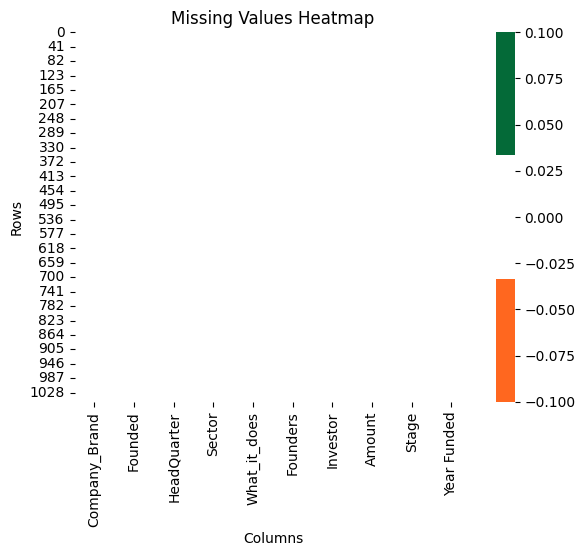

In [418]:
plot_missing_values_heatmap(data_2020)

    5.3.4 Data 2021


In [419]:
data_2021.sample(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
871,TurboHire,2019.0,Hyderabad,Computer Software,Industry-leading augmented intelligence softwa...,Deepak Agrawal,"Arcilla, Samir Khosla",$Undisclosed,None
948,ANS Commerce,2017.0,Gurugram,E-commerce,ANS Commerce is India’s #1 full-stack e-commer...,"Amit Monga, Nakul Singh, Vibhor Sahare, Sushan...","Gokul Rajaram, Venture Catalysts",$2200000,Pre-series A
1130,Lio,2020.0,Pune,Computer Software,Lio is the one app for all data where you can ...,Anupam Vijayvergia,"Lightspeed, Sequioa",$5000000,Seed
51,Oye Rickshaw,2017.0,Gurugram,Transportation,Oye Rickshaw is an electric vehicle energy sol...,"Akash Deep, Mohit Sharma","Alteria Capital, Chiratae Ventures","$3,000,000",None
99,NeoDocs,2020.0,Mumbai,Healthtech,Neodocs is a part of India's prominent Social ...,"Nikunj Malpani, Anurag Meena, Pratik Lodha","Y Combinator, 9Unicorns, Titan Capital",$Undisclosed,None


In [420]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


- Missing values in Founded, HeadQuarter, Founders, Investor, Amount and Stage columns
- most colummns are object

Action to take is clean each column one by one


In [421]:
# duplicates
data_2021.duplicated().sum()

19

In [422]:
# our duplicates
data_2021[data_2021.duplicated()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None
243,Trinkerr,2021.0,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,$6600000,Series A
244,Zorro,2021.0,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",$32000000,Seed
245,Ultraviolette,2021.0,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",$150000000,Series C
246,NephroPlus,2009.0,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,$24000000,Series E
247,Unremot,2020.0,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,$700000,Seed


In [423]:
# remove duplicate
data_2021 = data_2021.drop_duplicates().reset_index(drop=True)


In [424]:
data_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1185,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1186,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1187,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1188,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


Handle Missing values


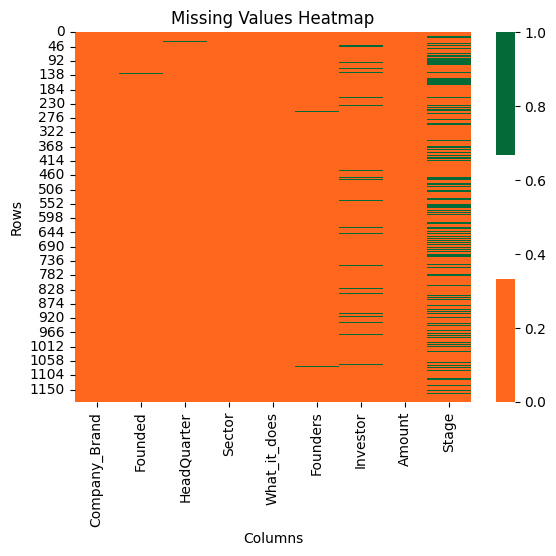

In [425]:
plot_missing_values_heatmap(data_2021)

Founded column


In [426]:
#  'Founded' column
data_2021['Founded'].isnull().sum()

1

In [427]:
# Imputing missing values as its only one missing values there

array = data_2021['Founded'].values.reshape(-1,1)
imputer = SimpleImputer(strategy='most_frequent')

data_2021['Founded'] = imputer.fit_transform(array)

In [428]:
data_2021['Founded'].isnull().sum()

0

HeadQuater column


In [429]:
check_missing_values(data_2021['HeadQuarter'])

1

In [430]:

most_frequent = data_2021['HeadQuarter'].mode()[0]
# Replace None (or NaN) with the most frequent value
data_2021['HeadQuarter'] = data_2021['HeadQuarter'].replace({None: most_frequent, np.nan: most_frequent})

In [431]:
check_missing_values(data_2021['HeadQuarter'])

0

In [432]:
data_2021['HeadQuarter'].unique().tolist()

['Bangalore',
 'Mumbai',
 'Gurugram',
 'New Delhi',
 'Hyderabad',
 'Jaipur',
 'Ahmadabad',
 'Chennai',
 'Small Towns, Andhra Pradesh',
 'Goa',
 'Rajsamand',
 'Ranchi',
 'Faridabad, Haryana',
 'Gujarat',
 'Pune',
 'Thane',
 'Computer Games',
 'Cochin',
 'Noida',
 'Chandigarh',
 'Gurgaon',
 'Vadodara',
 'Food & Beverages',
 'Pharmaceuticals\t#REF!',
 'Gurugram\t#REF!',
 'Kolkata',
 'Ahmedabad',
 'Mohali',
 'Haryana',
 'Indore',
 'Powai',
 'Ghaziabad',
 'Nagpur',
 'West Bengal',
 'Patna',
 'Samsitpur',
 'Lucknow',
 'Telangana',
 'Silvassa',
 'Thiruvananthapuram',
 'Faridabad',
 'Roorkee',
 'Ambernath',
 'Panchkula',
 'Surat',
 'Coimbatore',
 'Andheri',
 'Mangalore',
 'Telugana',
 'Bhubaneswar',
 'Kottayam',
 'Beijing',
 'Panaji',
 'Satara',
 'Orissia',
 'Jodhpur',
 'New York',
 'Santra',
 'Mountain View, CA',
 'Trivandrum',
 'Jharkhand',
 'Kanpur',
 'Bhilwara',
 'Guwahati',
 'Online Media\t#REF!',
 'Kochi',
 'London',
 'Information Technology & Services',
 'The Nilgiris',
 'Gandhinagar']

Founders column


In [433]:
check_missing_values(data_2021['Founders'])

4

column Stage


In [434]:
# stage  column
data_2021['Stage'].value_counts()

Stage
Seed             241
Pre-series A     154
Series A         125
Series B          49
Pre-seed          47
Series C          44
Debt              27
Series D          21
Series E          17
Pre-series B      10
Series F           6
Pre-series A1      4
Pre-series         2
$300000            2
Series H           2
Series G           2
Bridge             2
Series A+          1
Series F2          1
Series B3          1
PE                 1
Series F1          1
Seed+              1
Early seed         1
Series D1          1
$6000000           1
$1000000           1
Seies A            1
$1200000           1
Series A2          1
Series I           1
Name: count, dtype: int64

let look up on row with amout stage


In [435]:
amount_values = [ '$1200000','$300000', '$6000000', '$1000000']

filtered_data = data_2021[data_2021['Stage'].isin(amount_values)]
filtered_data

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
519,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000
532,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000
655,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,None,$6000000
658,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000


Amount column


lets swap the value of this rows


In [436]:
# values swapping by function and Apply function to swap 'Amount($)' and 'Stage' columns
def valueSwap(data, row_index, column1, column2):
    data_modified = data.copy()
    value1 = data_modified.at[row_index, column1]
    value2 = data_modified.at[row_index, column2]
    data_modified.at[row_index, column1] = value2
    data_modified.at[row_index, column2] = value1
    return data_modified

data_2021 = valueSwap(data_2021, 98, 'Amount', 'Stage')
data_2021 = valueSwap(data_2021, 519, 'Amount', 'Stage')
data_2021 = valueSwap(data_2021, 532, 'Amount', 'Stage')
data_2021 = valueSwap(data_2021, 655, 'Amount', 'Stage')
data_2021 = valueSwap(data_2021, 658, 'Amount', 'Stage')

modified_rows = data_2021.loc[[98, 519, 532, 655, 658]]

modified_rows



,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,Upsparks
519,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,$300000,ah! Ventures
532,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",$300000,"ITO Angel Network, LetsVenture"
655,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,$6000000,None
658,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,$1000000,"JITO Angel Network, LetsVenture"


In [437]:
# check the row with the stage that is amount
data_2021['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Upsparks', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'ah! Ventures', 'ITO Angel Network, LetsVenture',
       'Early seed', 'Series D1', 'JITO Angel Network, LetsVenture',
       'Seies A', 'Pre-series', 'Series A2', 'Series I'], dtype=object)

In [438]:


# Replace values

data_2021['Stage'].replace('Series B+', 'Series B', inplace=True)
data_2021['Stage'].replace('Pre-series1', 'Pre-series', inplace=True)
data_2021['Stage'].replace('Pre-Series B', 'Series A', inplace=True)
data_2021['Stage'].replace(' Series B', 'Series B', inplace=True)

In [439]:
data_2021['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Upsparks', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'ah! Ventures', 'ITO Angel Network, LetsVenture',
       'Early seed', 'Series D1', 'JITO Angel Network, LetsVenture',
       'Seies A', 'Pre-series', 'Series A2', 'Series I'], dtype=object)

In [440]:

def update_value(value):

    replacements = {
        r'None|Upsparks|Bridge|Unknown, Unknown|ah! Ventures|ITO Angel Network|LetsVenture|JITO Angel Network': 'Unknown', }

    for pattern, replacement in replacements.items():
        value = re.sub(pattern, replacement, str(value))

    return value

# Apply the function to the 'Stage' column of the DataFrame
data_2021['Stage'] = data_2021['Stage'].apply(update_value)



In [441]:

data_2021['Stage'].unique().tolist()

['Pre-series A',
 'Unknown',
 'Series D',
 'Series C',
 'Seed',
 'Series B',
 'Series E',
 'Pre-seed',
 'Series A',
 'Pre-series B',
 'Debt',
 'Seed+',
 'Series F2',
 'Series A+',
 'Series G',
 'Series F',
 'Series H',
 'Series B3',
 'PE',
 'Series F1',
 'Pre-series A1',
 'Unknown, Unknown',
 'Early seed',
 'Series D1',
 'Seies A',
 'Pre-series',
 'Series A2',
 'Series I']

In [442]:
filtered_data

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
519,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000
532,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000
655,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,None,$6000000
658,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000


amount column


In [443]:
data_2021['Amount'].unique().tolist()

['$1,200,000',
 '$120,000,000',
 '$30,000,000',
 '$51,000,000',
 '$2,000,000',
 '$188,000,000',
 '$200,000',
 'Undisclosed',
 '$1,000,000',
 '$3,000,000',
 '$100,000',
 '$700,000',
 '$9,000,000',
 '$40,000,000',
 '$49,000,000',
 '$400,000',
 '$300,000',
 '$25,000,000',
 '$160,000,000',
 '$150,000',
 '$1,800,000',
 '$5,000,000',
 '$850,000',
 '$53,000,000',
 '$500,000',
 '$1,100,000',
 '$6,000,000',
 '$800,000',
 '$10,000,000',
 '$21,000,000',
 '$7,500,000',
 '$26,000,000',
 '$7,400,000',
 '$1,500,000',
 '$600,000',
 '$800,000,000',
 '$17,000,000',
 '$3,500,000',
 '$15,000,000',
 '$215,000,000',
 '$2,500,000',
 '$350,000,000',
 '$5,500,000',
 '$83,000,000',
 '$110,000,000',
 '$500,000,000',
 '$65,000,000',
 '$150,000,000,000',
 '$300,000,000',
 '$2,200,000',
 '$35,000,000',
 '$140,000,000',
 '$4,000,000',
 '$13,000,000',
 None,
 '$Undisclosed',
 '$2000000',
 '$800000',
 '$6000000',
 '$2500000',
 '$9500000',
 '$13000000',
 '$5000000',
 '$8000000',
 '$1000000',
 '$1200000',
 '$200000',
 '

In [444]:
check_amount = ['Undisclosed','None','$Undisclosed','Series C','Seed','$undisclosed','Pre-series A','$']
filtered_amount = data_2021[data_2021['Amount'].isin(check_amount)]
filtered_amount

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,Unknown
21,Uable,2020.0,Bangalore,EdTech,Uable offers role based programmes to empower ...,Saurabh Saxena,"Chiratae Ventures, JAFCO Asia",Undisclosed,Seed
39,TruNativ,2019.0,Mumbai,Food & Beverages,TruNativ Foods & Beverages Pvt Ltd,"Pranav Malhotra, Mamta Malhotra",9Unicorns,Undisclosed,Seed
54,AntWak,2019.0,Bangalore,EdTech,AntWak provides a video platform for e-learnin...,"Basav Nagur, Joybroto Ganguly, Sudhanshu Shekh...","Vaibhav Domkundwar, Kunal Shah",Undisclosed,Seed
...,...,...,...,...,...,...,...,...,...
1129,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,Seed,Unknown
1141,Atomberg Technologies,2012.0,Mumbai,Consumer Electronics,A maker of energy-efficient smart fans,"Manoj Meena, Sibabrata Das",Ka Enterprises,$Undisclosed,Unknown
1142,Genext Students,2013.0,Mumbai,EdTech,LIVE online classes with expert tutors for K-1...,"Ali Asgar Kagzi, Piyush Dhanuka",Navneet Education,$Undisclosed,Unknown
1147,OckyPocky,2015.0,Gurugram,EdTech,OckyPocky is India's 1st interactive English l...,Amit Agrawal,"Sujeet Kumar, SucSEED Indovation Fund",$Undisclosed,Seed


In [445]:
data_2021['Amount'].dtype

dtype('O')

In [446]:
data_2021['Amount'] = data_2021['Amount'].replace(check_amount, np.nan)

# Step 2: Remove undesired characters
data_2021['Amount'] = data_2021['Amount'].str.replace('[$,]', '', regex=True)


In [447]:
# remove # sign in from as keep in mind the our amount is in dollar sign
# removing comm
data_2021['Amount'] = data_2021['Amount'].str.replace(',', '')
data_2021['Amount'] = data_2021['Amount'].replace('None', '')
data_2021['Amount'] = data_2021['Amount'].replace("'$", '')
data_2021['Amount'] = data_2021['Amount'].replace("'", '')



In [448]:
data_2021['Amount'].unique().tolist() 

['1200000',
 '120000000',
 '30000000',
 '51000000',
 '2000000',
 '188000000',
 '200000',
 nan,
 '1000000',
 '3000000',
 '100000',
 '700000',
 '9000000',
 '40000000',
 '49000000',
 '400000',
 '300000',
 '25000000',
 '160000000',
 '150000',
 '1800000',
 '5000000',
 '850000',
 '53000000',
 '500000',
 '1100000',
 '6000000',
 '800000',
 '10000000',
 '21000000',
 '7500000',
 '26000000',
 '7400000',
 '1500000',
 '600000',
 '800000000',
 '17000000',
 '3500000',
 '15000000',
 '215000000',
 '2500000',
 '350000000',
 '5500000',
 '83000000',
 '110000000',
 '500000000',
 '65000000',
 '150000000000',
 '300000000',
 '2200000',
 '35000000',
 '140000000',
 '4000000',
 '13000000',
 None,
 '9500000',
 '8000000',
 '12000000',
 '1700000',
 '150000000',
 '100000000',
 '225000000',
 '6700000',
 '1300000',
 '20000000',
 '250000',
 '52000000',
 '3800000',
 '17500000',
 '42000000',
 '2300000',
 '7000000',
 '450000000',
 '28000000',
 '8500000',
 '37000000',
 '370000000',
 '16000000',
 '44000000',
 '770000',
 '12

In [449]:

data_2021.iloc[[658]]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
658,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,1000000,"Unknown, Unknown"


In [450]:

data_2021['Amount'].dtype

dtype('O')

In [451]:
data_2021['Amount'].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', nan, '1000000', '3000000', '100000',
       '700000', '9000000', '40000000', '49000000', '400000', '300000',
       '25000000', '160000000', '150000', '1800000', '5000000', '850000',
       '53000000', '500000', '1100000', '6000000', '800000', '10000000',
       '21000000', '7500000', '26000000', '7400000', '1500000', '600000',
       '800000000', '17000000', '3500000', '15000000', '215000000',
       '2500000', '350000000', '5500000', '83000000', '110000000',
       '500000000', '65000000', '150000000000', '300000000', '2200000',
       '35000000', '140000000', '4000000', '13000000', None, '9500000',
       '8000000', '12000000', '1700000', '150000000', '100000000',
       '225000000', '6700000', '1300000', '20000000', '250000',
       '52000000', '3800000', '17500000', '42000000', '2300000',
       '7000000', '450000000', '28000000', '8500000', '37000000',
       '370000000', '16000000', '

clean the row with amount '$1000000'


In [452]:
# Cleaning the 'Amount($)' column by removing single quotes and converting the values to numeric

data_2021['Amount']  = data_2021['Amount'].replace({"'": "",'$': ''}, regex=True)



In [453]:
data_2021['Amount'].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', nan, '1000000', '3000000', '100000',
       '700000', '9000000', '40000000', '49000000', '400000', '300000',
       '25000000', '160000000', '150000', '1800000', '5000000', '850000',
       '53000000', '500000', '1100000', '6000000', '800000', '10000000',
       '21000000', '7500000', '26000000', '7400000', '1500000', '600000',
       '800000000', '17000000', '3500000', '15000000', '215000000',
       '2500000', '350000000', '5500000', '83000000', '110000000',
       '500000000', '65000000', '150000000000', '300000000', '2200000',
       '35000000', '140000000', '4000000', '13000000', None, '9500000',
       '8000000', '12000000', '1700000', '150000000', '100000000',
       '225000000', '6700000', '1300000', '20000000', '250000',
       '52000000', '3800000', '17500000', '42000000', '2300000',
       '7000000', '450000000', '28000000', '8500000', '37000000',
       '370000000', '16000000', '

In [454]:
data_2021['Amount'] = pd.to_numeric(data_2021['Amount'])

In [455]:
Outliers2021 = detect_outliers(data_2021, 'Amount')
Outliers2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,Unknown
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C
5,Urban Company,2014.0,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,188000000.0,Unknown
15,Tessolve,1993.0,Bangalore,Electronics,Tessolve Semiconductor offers engineering in s...,"P Raja Manickam, Srinivas Chinamilli, Veerappan V",Novo Tellus Capital,40000000.0,Unknown
16,Smart Joules,2014.0,New Delhi,Renewable Energy,Smart Joules is an energy management company.,"Arjun P Gupta, Ujjal Majumdar, Sidhartha Gupta","Raintree Family Office, ADB arm",49000000.0,Unknown
...,...,...,...,...,...,...,...,...,...
1138,Pine Labs,1998.0,Noida,Information Technology & Services,A merchant platform company that provides fina...,Amrish Rau,Invesco Developing Markets Fund,100000000.0,Unknown
1150,HomeLane,2014.0,Bangalore,Interior Design,"Tech-empowered teams have delivered over 20,00...",Srikanth Iyer,"IIFL AMC, Oman India Joint Investment Fund",50000000.0,Series E
1157,Peak,2014.0,Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,75000000.0,Series C
1176,Delhivery,2011.0,Gurugram,Logistics & Supply Chain,Delhivery is a leading logistics and supply ch...,Sahil Barua,Addition,76000000.0,Series I


AM not removing outlier as amount the a company can receive as total investement from multiple investors, as seen some startup receive multiple investment


hanlde missing values


In [456]:
# handle missing value by imputting median strategy
imputer = SimpleImputer(strategy ='median') 

data_2021['Amount'] = imputer.fit_transform(data_2021[['Amount']])

In [457]:
data_2021['Stage'].isnull().sum()

0

categorized the stage column


In [458]:
data_2021['Stage'].unique()

array(['Pre-series A', 'Unknown', 'Series D', 'Series C', 'Seed',
       'Series B', 'Series E', 'Pre-seed', 'Series A', 'Pre-series B',
       'Debt', 'Seed+', 'Series F2', 'Series A+', 'Series G', 'Series F',
       'Series H', 'Series B3', 'PE', 'Series F1', 'Pre-series A1',
       'Unknown, Unknown', 'Early seed', 'Series D1', 'Seies A',
       'Pre-series', 'Series A2', 'Series I'], dtype=object)

Investor column


In [459]:
data_2021['Investor'].unique()

array(['BEENEXT, Entrepreneur First',
       'Unilazer Ventures, IIFL Asset Management',
       'GSV Ventures, Westbridge Capital', 'CDC Group, IDG Capital',
       'Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal', 'Vy Capital',
       'CIIE.CO, KIIT-TBI', 'Inflection Point Ventures',
       'Inflexor Ventures', None,
       '9Unicorns Accelerator Fund, Metaform Ventures',
       'SucSEED Indovation, IIM Calcutta Innovation Park',
       'Safe Planet Medicare', 'Impact Partners, C4D Partners',
       'Tiger Global Management, InnoVen Capital', 'Novo Tellus Capital',
       'Raintree Family Office, ADB arm',
       'Mumbai Angels, Narendra Shyamsukha', 'Paradigm, Kunal Shah',
       'Matrix Partners India, GIC', 'Chiratae Ventures, JAFCO Asia',
       'Mumbai Angels Network, Expert DOJO', 'GVFL',
       'Kotak Mahindra Bank, FMO', 'Kalaari Capital',
       'NB Ventures, IAN Fund',
       'Sequoia Capital India, Hummingbird Ventures',
       'Gaurav Munjal, Snehil Khanor', 'JITO Angel Net

In [460]:
# notice a numerical here investor named '2000000'ArithmeticError
data_2021[data_2021['Investor']== '2000000']


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
883,EyeMyEye,2021.0,Gurugram,Eyewear,"Shop the latest Eyeglasses, Sunglasses, Power ...",Ganesh Iyer,2000000,2000000.0,Pre-series A


In [461]:
# Replace the value "2000000" with the keyword "Unknown" in the 'Investor' column
data_2021['Investor'] = data_2021['Investor'].replace('2000000', 'Unknown')

In [462]:
check_missing_values(data_2021['Investor'])

61

In [463]:
data_2021['Investor'] = data_2021['Investor'].fillna('Unknown')

In [464]:
data_2021['Sector'].head(10)

0        AI startup
1            EdTech
2            EdTech
3    B2B E-commerce
4           FinTech
5     Home services
6        HealthTech
7        HealthTech
8      Tech Startup
9        E-commerce
Name: Sector, dtype: object

In [465]:
# lets track the funded year
data_2021['Year Funded'] = 2021

In [466]:
data_2021['HeadQuarter'] = data_2021['HeadQuarter'].fillna('Unknown')

data_2021['Founders'] = data_2021['Founders'].fillna('Unknown')

check miss value after cleaning


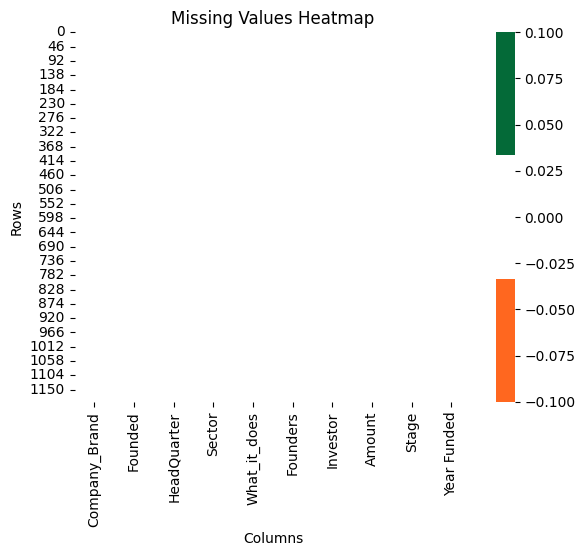

In [467]:
plot_missing_values_heatmap(data_2021)

check the duplicate for each


In [468]:
data_2018=data_2018.drop_duplicates()

In [469]:
data_2019=data_2019.drop_duplicates()

In [470]:
data_2020=data_2020.drop_duplicates()

In [471]:
data_2021=data_2021.drop_duplicates()

In [472]:
# Select the specified columns for analy
data_2018 = data_2018[['Company Name','Location','Industry','Amount','Round/Series', 'Year Funded']]
data_2019 = data_2019[['Company/Brand','HeadQuarter','Sector','Amount($)','Stage','Year Funded']]
data_2020 = data_2020[['Company_Brand','HeadQuarter','Sector','Amount','Stage','Year Funded']]
data_2021 = data_2021[['Company_Brand','HeadQuarter','Sector','Amount','Stage','Year Funded']]

columns rename to have the same columns in


In [473]:
#Renaming columns

data_2018.rename(columns={'Industry':'Sector','Round/Series':'Stage','Location':'HeadQuarter','Amount':'Amount($)'},inplace=True)

data_2019.rename(columns={'Company/Brand':'Company Name'},inplace=True)

data_2020.rename(columns={'Company_Brand':'Company Name','Amount':'Amount($)'},inplace=True)

data_2021.rename(columns={'Company_Brand':'Company Name','Amount':'Amount($)'},inplace =True) 

In [474]:
print(f'2018: {data_2018.columns}\n\n\
        2019: {data_2019.columns}\n\n\
        2020: {data_2020.columns}\n\n\
        2021: {data_2021.columns}')

2018: Index(['Company Name', 'HeadQuarter', 'Sector', 'Amount($)', 'Stage',
       'Year Funded'],
      dtype='object')

        2019: Index(['Company Name', 'HeadQuarter', 'Sector', 'Amount($)', 'Stage',
       'Year Funded'],
      dtype='object')

        2020: Index(['Company Name', 'HeadQuarter', 'Sector', 'Amount($)', 'Stage',
       'Year Funded'],
      dtype='object')

        2021: Index(['Company Name', 'HeadQuarter', 'Sector', 'Amount($)', 'Stage',
       'Year Funded'],
      dtype='object')


The data 2018 does not contained the Investor column


In [475]:
#Concating the dataset
combinedData = pd.concat([data_2018, data_2019, data_2020, data_2021], ignore_index=True)


In [476]:
combinedData.sample(20)

,Company Name,HeadQuarter,Sector,Amount($),Stage,Year Funded
590,Cubical Labs,Bangalore,Technology,6000000.0,Series B,2019
1983,Codingal,Bangalore,EdTech,3500000.0,Unknown,2021
2616,ProfitWheel,Mumbai,Marketing & Advertising,3000000.0,Seed,2021
1807,BatteryPool,Pune,Automotive,3500000.0,Seed,2021
876,Clair,Outside India,Finance,4500000.0,Seed,2020
2409,Livve Homes,Bangalore,Rental space,5000000.0,Unknown,2021
2637,Melorra,Bangalore,D2C jewellery,24000000.0,Unknown,2021
538,JobSquare,Ahmedabad,Human Resources,140500.0,Series A,2019
952,Nykaa,Mumbai,Consumer Services,24700000.0,Series A,2020
2101,HobSpace,Mumbai,EdTech,100000.0,Pre-series A1,2021


In [477]:
# check the the
combinedData.duplicated().value_counts()

False    2845
True       11
Name: count, dtype: int64

In [478]:
combinedData[combinedData.duplicated(keep=False)]

,Company Name,HeadQuarter,Sector,Amount($),Stage,Year Funded
632,Pine Labs,Noida,Finance,3000000.0,Series A,2020
827,Genius Teacher,Mumbai,Education,2000000.0,Series A,2020
845,Genius Teacher,Mumbai,Education,2000000.0,Series A,2020
847,Tring,Mumbai,Entertainment,3000000.0,Series A,2020
1025,FPL Technologies,Pune,Finance,10000000.0,Series A,2020
1037,Lido Learning,Mumbai,Education,7500000.0,Series B,2020
1123,FPL Technologies,Pune,Finance,10000000.0,Series A,2020
1301,Tring,Mumbai,Entertainment,3000000.0,Series A,2020
1382,Capital Float,Bangalore,Finance,15000000.0,Series A,2020
1408,Lido Learning,Mumbai,Education,7500000.0,Series B,2020


In [479]:
combinedData = combinedData.drop_duplicates()

In [480]:
combinedData.duplicated().value_counts()

False    2845
Name: count, dtype: int64

    Data cleaning


Amount column


In [481]:
combinedData['Amount($)'].unique().tolist()

[250000.0,
 584795.3216374269,
 950292.3976608186,
 2000000.0,
 1300000.0,
 1600000.0,
 233918.12865497073,
 730994.1520467836,
 1461988.3040935672,
 150000.0,
 1100000.0,
 7309.941520467835,
 6000000.0,
 650000.0,
 511695.9064327485,
 935672.5146198829,
 292397.6608187134,
 1000000.0,
 5000000.0,
 4000000.0,
 438596.4912280701,
 2800000.0,
 1700000.0,
 73099.41520467836,
 182748.5380116959,
 219298.24561403506,
 500000.0,
 1520467.83625731,
 657894.7368421052,
 13400000.0,
 365497.0760233918,
 385964.91228070174,
 116959.06432748536,
 877.1929824561403,
 9000000.0,
 100000.0,
 20000.0,
 120000.0,
 497076.0233918128,
 143145.0,
 8771929.824561402,
 742000000.0,
 14619883.040935671,
 29239766.081871342,
 3980000.0,
 10000.0,
 1461.9883040935672,
 3654970.7602339177,
 1000000000.0,
 7000000.0,
 35000000.0,
 8040935.672514619,
 28500000.0,
 3508771.929824561,
 1754385.9649122804,
 2400000.0,
 30000000.0,
 36549707.60233918,
 23000000.0,
 11000000.0,
 643274.8538011695,
 3240000.0,
 877192

Stage column


In [482]:
combinedData['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', 'Pre-series A',
       'Series G', 'Post series A', 'Series F', 'Pre-seed', 'Pre-series',
       'Debt', 'Pre-series C', 'Pre-series B', 'Bridge', 'Edge', 'Seed A',
       'Series', 'Seed Round & Series A', 'Angel Round', 'Pre-Series C',
       'Mid series', 'Series C, D', 'Unknown', 'Seed+', 'Series F2',
       'Series A+', 'Series B3', 'PE', 'Series F1', 'Pre-series A1',
       'Unknown, Unknown', 'Early seed', 'Series D1', 'Seies A',
       'Series A2', 'Series I'], dtype=object)

let clean the stage and caterorized in mininal stage as possible


In [483]:
combinedData[(combinedData['Stage'] == "https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593")]

,Company Name,HeadQuarter,Sector,Amount($),Stage,Year Funded
178,BuyForexOnline,Bangalore,Marketing,2000000.0,https://docs.google.com/spreadsheets/d/1x9ziNe...,2018


In [484]:
combinedData['Stage'] = combinedData['Stage'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593', 'Unknown')
combinedData['Stage'] = combinedData['Stage'].replace('Unknown, Unknown', 'Unknown')


In [485]:
combinedData['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed', 'Unknown',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', 'Pre-series A',
       'Series G', 'Post series A', 'Series F', 'Pre-seed', 'Pre-series',
       'Debt', 'Pre-series C', 'Pre-series B', 'Bridge', 'Edge', 'Seed A',
       'Series', 'Seed Round & Series A', 'Angel Round', 'Pre-Series C',
       'Mid series', 'Series C, D', 'Seed+', 'Series F2', 'Series A+',
       'Series B3', 'PE', 'Series F1', 'Pre-series A1', 'Early seed',
       'Series D1', 'Seies A', 'Series A2', 'Series I'], dtype=object)

categorize the stage


In [486]:

def categorize_funding_stage(stage):
    pre_Seed = ['Pre-Seed','Early seed' ]
    seed_stages = ['Seed','Seed A','Seed Round & Series A','Seed+']
    pre_series = ['Pre-series','Pre-series A','Pre-series C', 'Pre-series B','Pre-series A1']
    series = ['Series A', 'Series A+', 'Seies A', 'Mid series','Series A2', 'Series A1', 'Series Unknown','Venture - Series Unknown','Series B', 'Series B+', 'Series B2', 'Series B3', 'Series C', 'Series C, D', 'Post series A','Series D', 'Series D1', 'Series E', 'Series E2', 'Series F', 'Series F1', 'Series F2', 'Series G', 'Series H', 'Series I']
    later_stages = ['Angel Round', 'Corporate Round', 'Funding Round',  'Bridge', 'Bridge Round',  'Post-IPO Equity', 'Secondary Market', 'Non-equity Assistance', 'Grant', 'Undisclosed', 'Unknown']
    debt = ['Post-IPO Debt', 'Debt Financing', 'Debt']
    others = ['Edge', 'Private Equity', 'PE', 'Angel', 'Angel Round','Unknown']


    if stage in pre_Seed:
        return 'Pre Seed Stage '
    elif stage in seed_stages:
        return 'Seed Stage '
    elif stage in pre_series:
        return 'Pre Series Stage '
    elif stage in series:
        return 'Series Stage '
    elif stage in later_stages:
        return 'Later Stage '
    elif stage in debt:
        return 'Debt Stage '
    else:
        return 'Others Stage '


combinedData['Stage'] = combinedData['Stage'].apply(categorize_funding_stage)

In [487]:
combinedData['Stage'].unique()

array(['Seed Stage ', 'Series Stage ', 'Others Stage ', 'Pre Seed Stage ',
       'Later Stage ', 'Debt Stage ', 'Pre Series Stage '], dtype=object)

In [488]:
combinedData.sample(10)

,Company Name,HeadQuarter,Sector,Amount($),Stage,Year Funded
1358,NIRA,Bangalore,Finance,2100000.0,Pre Series Stage,2020
250,MEngage,Jaipur,Healthcare,175000.0,Seed Stage,2018
1527,Big Basket,Bangalore,Business Services,3500000.0,Series Stage,2020
1124,Masai School,Bangalore,Education,2500000.0,Series Stage,2020
1703,EF Polymer,Rajsamand,AgriTech,200000.0,Later Stage,2021
1769,Sporjo,Mumbai,SportsTech,2000000.0,Later Stage,2021
443,Zomato,Gurgaon,Transport,210000000.0,Later Stage,2018
2140,Inspacco,Pune,Facilities Services,200000.0,Later Stage,2021
2169,CareerNinja,Mumbai,EdTech,3500000.0,Seed Stage,2021
2708,Wallmantra,Noida,Arts & Crafts,3500000.0,Later Stage,2021


Sector column


In [489]:
combinedData['Sector'].unique()

array(['Marketing', 'Finance', 'E-Commerce', 'Technology', 'Transport',
       'Education', 'Entertainment', 'Healthcare', 'Business Services',
       'Human Resources', 'Consumer Services', 'Industrial', 'Justince',
       'Agriculture', 'AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Transportation',
       'LegalTech', 'Food delivery', 'Automotive', 'SaaS startup',
       'Fantasy sports', 'Video communication', 'Social Media',
       'Skill development', 'Rental', 'Recruitment', 'HealthCare',
       'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'App

In [490]:
# List of categories
Sector = combinedData['Sector']
def Sectors_redistributionCombinedData(Sector):
    if re.search(r'Marketing|Marketing & Advertising|Advertisement|Content creation|Content publishing|Blogging|Social media|Social network|Social platform|Social audio|Online storytelling|Social commerce|Podcast|Celebrity Engagement|Content commerce|Social community|Consumer software|Digital platform|Online Media|Innovation Management', Sector, re.IGNORECASE):
        return 'Marketing'
    
    elif re.search(r'Transport|Transportation|Logistics|Bike Rental|EV startup|Vehicle repair startup|Mobility|Logistics & Supply Chain|Delivery service|Telecommuncation|Oil and Energy|Renewable Energy|CleanTech|Real estate|Automotive|Automobile|Automotive|Environmental Services',Sector, re.IGNORECASE):
        return 'Transport'
    
    elif re.search(r'Technology|AI startup|HealthTech|Deep Tech| AI Chatbot|IT|Tech Startup|IT startup|Deeptech|Insuretech|IoT|Blockchain|AR startup|IoT platform|Tech startup|Healthtech|MLOps platform|SpaceTech|Drone|Environmental Services|Automation|Analytics|Information Technology|Information Technology & Services|TaaS startup|Computer Software|Software company|Software Startup|SaaS|SaaS startup|Innovation Management|Computer & Network Security|Cloud kitchen|Company-as-a-Service|Digital platform|Mobility|Social media|Video communication|Computer Games|Computer software|AR startup|Machine learning|Data Science', Sector, re.IGNORECASE):
        return 'Technology'
    
    elif re.search(r'Healthcare|HealthCare| Helathcare|Health care|HeathTech|Heathcare|Health|Healthcare|Healthtech|Hospital & Health Care|Health, Wellness & Fitness|Medical devices|Biotechnology|Medical|HealthTech|Healthcare|Biotechnology|Health, Wellness & Fitness|Medical devices|HealthTech|BioTechnology|Personal Care|Veterinary|FemTech|Femtech', Sector, re.IGNORECASE):
        return 'Healthcare' #He
    
    elif re.search(r'E-Commerce|B2B E-commerce| Social commerce|Content commerce|B2B marketplace|B2B Ecommerce|Online Media|Social media|Social network|Social platform|Social audio|Online storytelling|Blogging|Social community|Consumer software|D2C|D2C Business|D2C Fashion|NFT Marketplace|D2C jewellery|E-commerce|B2B|B2B service|B2B startup|B2B Marketplace|B2B Manufacturing|B2B Travel|B2B Ecommerce|B2B marketplace|B2B E-commerce', Sector, re.IGNORECASE):
        return 'E-Commerce'
    
    elif re.search(r'Education|EdTech|E-learning|Education Management| Skill development|Higher Education|Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.|Digital platform|Cultural|Facilities Services|Higher Education', Sector, re.IGNORECASE):
        return 'Education'
    
    elif re.search(r'Entertainment Gaming|Video communication|Fantasy sports|Sports|Music|Podcast|Celebrity Engagement|SportsTech|Sports startup|Foootwear|Entertainment|Dating|Social Media|Content creation|Media|OTT|Sports', Sector, re.IGNORECASE):
        return 'Entertainment'
    
    elif re.search(r'Finance|FinTech| Financial Services|Venture Capital|Capital Markets|Investment Banking|Cryptocurrency|Blockchain startup|InsureTech|Digital mortgage|Equity Management|Venture Capital & Private Equity|Investment Management|NFT Marketplace|Venture capitalist|Banking', Sector, re.IGNORECASE):
        return 'Finance' 
    
    elif re.search(r'Consumer Services|Home services|Home Decor|Real estate| Rental|Rental space|Furniture|Furniture Rental|Co-working|Facilities Services|CleanTech|Environmental Services|Environmental service|Pollution control equiptment|Renewable Energy|Renewables & Environment|Solar|Water purification|Consumer Services|Consumer Goods|Consumer service|Consumer goods|Consumer Electronics|Consumer Services|Consumer service|Personal Care|Consumer Goods|Consumer software|Home services|Consumer electronics|Consumer software|Consumer services|Eyewear|Pet care|Pet care|Housing Marketplace|Rental|Merchandise|Beauty products|Apparel & Fashion|Fashion|Fashion & lifestyle|Fashion and lifestyle|Cosmetics|Fashion & Lifestyle|Eyewear|Apparel & Fashion', Sector, re.IGNORECASE):
        return 'Consumer Services'
    
    elif re.search(r'Industrial|Industrial Automation|Mechanical & Industrial Engineering| Mechanical Or Industrial Engineering|Aerospace|Defense & Space|Aviation & Aerospace|Manufacturing startup|Nanotechnology|Aviation|Defense & Space|Industrial|Pollution control equiptment|Nanotechnology|Mechanical & Industrial Engineering|Industrial Automation|Industrial Automation|Mechanical Or Industrial Engineering|Industrial', Sector, re.IGNORECASE):
        return 'Industrial' 
    
    elif re.search(r'Agriculture|AgriTech|Farming|Food Production|Food & Beverages|Food delivery|Food Industry|Food and Beverages|Food|Food & Beverages|Milk startup|Food|Food & Beverages|Fishery|AgriTech|Environmental Services|Renewables & Environment|Solar|Agriculture|Agricultur', Sector, re.IGNORECASE):
        return 'Agriculture'
    
    elif re.search(r'Human Resources|HR Tech|Recruitment|HRTech|Human Resources|Staffing & Recruiting|Recruitment', Sector, re.IGNORECASE):
        return 'Human Resources'
    
    elif re.search(r'Business Services|Business Supplies & Equipment|Professional Training & Coaching|Management Consulting|Consulting|Advisory firm|Information Services|Translation & Localization|HRTech|Recruitment|Staffing & Recruiting|Job discovery platform|CRM|B2B service|B2B startup|Business Services|Capital Markets|Consulting', Sector, re.IGNORECASE):
        return 'Business Services'
    
    elif re.search(r'LegalTech|Legal Services|Justice|Legaltech|Legal Service', Sector, re.IGNORECASE):
        return 'Justice'
    
    elif re.search(r'Spiritual|', Sector, re.IGNORECASE):
        return 'Religious'
    
    else:
        return Sector






In [491]:
combinedData['Sector'] = combinedData['Sector'].apply(Sectors_redistributionCombinedData)

In [492]:
combinedData['Sector'].unique()

array(['Marketing', 'Finance', 'E-Commerce', 'Technology', 'Transport',
       'Education', 'Entertainment', 'Healthcare', 'Business Services',
       'Human Resources', 'Consumer Services', 'Industrial', 'Religious',
       'Agriculture', 'Justice'], dtype=object)

Column HeadQuarter


In [493]:
uniqueValue = combinedData['HeadQuarter'].unique()
uniqueValue = uniqueValue.tolist()
uniqueValue = sorted(uniqueValue)
uniqueValue


['Ahmadabad',
 'Ahmedabad',
 'Alleppey',
 'Alwar',
 'Ambernath',
 'Anand',
 'Andheri',
 'Azadpur',
 'Bangalore',
 'Bangalore City',
 'Banglore',
 'Beijing',
 'Belgaum',
 'Bengaluru',
 'Bhilwara',
 'Bhopal',
 'Bhubaneswar',
 'Bihar',
 'Chandigarh',
 'Chennai',
 'Cochin',
 'Coimbatore',
 'Computer Games',
 'Dehradun',
 'Delhi',
 'Dhingsara',
 'Ernakulam',
 'Faridabad',
 'Faridabad, Haryana',
 'Food & Beverages',
 'Frisco',
 'Gandhinagar',
 'Ghaziabad',
 'Goa',
 'Guindy',
 'Gujarat',
 'Guntur',
 'Gurgaon',
 'Gurugram',
 'Gurugram\t#REF!',
 'Guwahati',
 'Haryana',
 'Hubli',
 'Hyderabad',
 'Hyderebad',
 'India',
 'Indore',
 'Information Technology & Services',
 'Irvine',
 'Jaipur',
 'Jharkhand',
 'Jiaxing',
 'Jodhpur',
 'Kalkaji',
 'Kalpakkam',
 'Kannur',
 'Kanpur',
 'Kerala',
 'Kochi',
 'Kolkata',
 'Kormangala',
 'Kota',
 'Kottayam',
 'London',
 'Lucknow',
 'Ludhiana',
 'Mangalore',
 'Margão',
 'Milano',
 'Mohali',
 'Mountain View, CA',
 'Mumbai',
 'Mylapore',
 'Nagpur',
 'New Delhi',
 'Ne

In [494]:
combinedData['HeadQuarter'].describe()

count          2845
unique          123
top       Bangalore
freq            969
Name: HeadQuarter, dtype: object

column Stage


In [495]:

unique_values = combinedData['HeadQuarter'].unique()
unique_list = unique_values.tolist()
sorted_list = sorted(unique_list)
for i in sorted_list:
    print(i)


Ahmadabad
Ahmedabad
Alleppey
Alwar
Ambernath
Anand
Andheri
Azadpur
Bangalore
Bangalore City
Banglore
Beijing
Belgaum
Bengaluru
Bhilwara
Bhopal
Bhubaneswar
Bihar
Chandigarh
Chennai
Cochin
Coimbatore
Computer Games
Dehradun
Delhi
Dhingsara
Ernakulam
Faridabad
Faridabad, Haryana
Food & Beverages
Frisco
Gandhinagar
Ghaziabad
Goa
Guindy
Gujarat
Guntur
Gurgaon
Gurugram
Gurugram	#REF!
Guwahati
Haryana
Hubli
Hyderabad
Hyderebad
India
Indore
Information Technology & Services
Irvine
Jaipur
Jharkhand
Jiaxing
Jodhpur
Kalkaji
Kalpakkam
Kannur
Kanpur
Kerala
Kochi
Kolkata
Kormangala
Kota
Kottayam
London
Lucknow
Ludhiana
Mangalore
Margão
Milano
Mohali
Mountain View, CA
Mumbai
Mylapore
Nagpur
New Delhi
New York
Newcastle Upon Tyne
Noida
Odisha
Online Media	#REF!
Orissia
Outside India
Palmwoods
Panaji
Panchkula
Paris
Patna
Pharmaceuticals	#REF!
Plano
Powai
Pune
Rajastan
Rajasthan
Rajsamand
Ranchi
Riyadh
Roorkee
Samastipur
Samsitpur
San Francisco Bay Area
San Ramon
Santra
Satara
Shanghai
Silvassa
Small T

In [496]:
combinedData.replace({'HeadQuarter': {"Ahmadabad":"Ahmedabad",
                        "Bangalore City|Banglore" :"Bangalore",
                        "Beijing|Frisco|Irvine|Jiaxing|London|The Nilgiris|Tangerang|San Ramon|Shanghai|San Francisco Bay Area|Milano|Mountain View, CA|New York|Newcastle Upon Tyne|Palmwoods|Paris": "Outside India",
                        "Faridabad, Haryana":"Faridabad",
                        "Gurugram	#REF!":"Gurugram",
                        "Hyderebad":"Hyderebad",
                        "India|Computer Games|Food & Beverages|Information Technology & Services|Online Media	#REF!|Pharmaceuticals	#REF!":"Bangalore", #most frequency
                        "Kalkaji":"Delhi",
                        "Mylapore":"Chennai",
                        "Rajastan":"Rajasthan",
                        "Santra":"Gujarat",
                        "Small Towns, Andhra Pradesh":"Amaravati",
                        "Telugana":"Telangana",
                        "Uttar pradesh":"Uttar Pradesh",
                        "Worli":"Mumbai"
                    }},inplace =True, regex=True)

In [497]:
combinedData['HeadQuarter'].unique().tolist()

['Bangalore',
 'Mumbai',
 'Gurgaon',
 'Noida',
 'Hyderabad',
 'Bengaluru',
 'Delhi',
 'Hubli',
 'New Delhi',
 'Chennai',
 'Mohali',
 'Kolkata',
 'Pune',
 'Jodhpur',
 'Kanpur',
 'Ahmedabad',
 'Azadpur',
 'Haryana',
 'Cochin',
 'Faridabad',
 'Jaipur',
 'Kota',
 'Anand',
 'Belgaum',
 'Thane',
 'Margão',
 'Indore',
 'Alwar',
 'Kannur',
 'Trivandrum',
 'Ernakulam',
 'Kormangala',
 'Uttar Pradesh',
 'Andheri',
 'Ghaziabad',
 'Kochi',
 'Powai',
 'Guntur',
 'Kalpakkam',
 'Bhopal',
 'Coimbatore',
 'Alleppey',
 'Chandigarh',
 'Guindy',
 'Lucknow',
 'Telangana',
 'Gurugram',
 'Surat',
 'Rajasthan',
 'Tirunelveli',
 'Outside Bangalore',
 'Gujarat',
 'Kerala',
 'Outside India',
 'Dhingsara',
 'Patna',
 'Plano',
 'Samastipur',
 'Tumkur',
 'Ludhiana',
 'Dehradun',
 'Riyadh',
 'Warangal',
 'Hyderebad',
 'Odisha',
 'Bihar',
 'Goa',
 'Tamil Nadu',
 'Amaravati',
 'Rajsamand',
 'Ranchi',
 'Vadodara',
 'Nagpur',
 'West Bengal',
 'Samsitpur',
 'Silvassa',
 'Thiruvananthapuram',
 'Roorkee',
 'Ambernath',
 'P

In [498]:
#Export the cleaned 
combinedData.to_excel('Cleaned Data for India Startup Funding analysis.xlsx', sheet_name='Sheet1',index=False)


#### **UNIVARIATE ANALYSIS**


- Univariate analysis involves the examination of a single variable (or feature) at a time. It is the simplest form of data analysis and is often used to describe the characteristics of individual variables.


Exploratory Data Analysis (EDA)


In [499]:
def plot_top_values(data, column_name, n=10, direction='v' , background_color='lightgrey'):

    # Group the data by the specified column and count occurrences
    column_counts = data[column_name].value_counts()

    # Retrieve the top n most frequent values
    top_n_values = column_counts.nlargest(n)

    # Convert the series to a DataFrame
    top_n_values_df = pd.DataFrame(top_n_values).reset_index()
    top_n_values_df.columns = [column_name, 'Count']

    # Define the colors of the Indian flag (saffron and green)
    colors = ['#046A38']

    # Plot the bar plot
    plt.figure(figsize=(20, 10), facecolor=background_color)
    ax = sns.barplot(data=top_n_values_df, x=column_name,orient= direction, y='Count', palette=colors*len(top_n_values_df))
    
    #  background color
    ax.set_facecolor(background_color)
    # the grid
    # ax.grid(True, color=grid_color)
    ax.set_axisbelow(True)
    
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Top {n} Most Frequent {column_name}s', fontsize=20, weight='bold')
    
    # labels on bar
    for index, row in top_n_values_df.iterrows():
        ax.text(index, row['Count'], row['Count'], weight='bold', ha="center")

    plt.show()


1. Top 10 Company that recieved multiple investment from 2018-2021


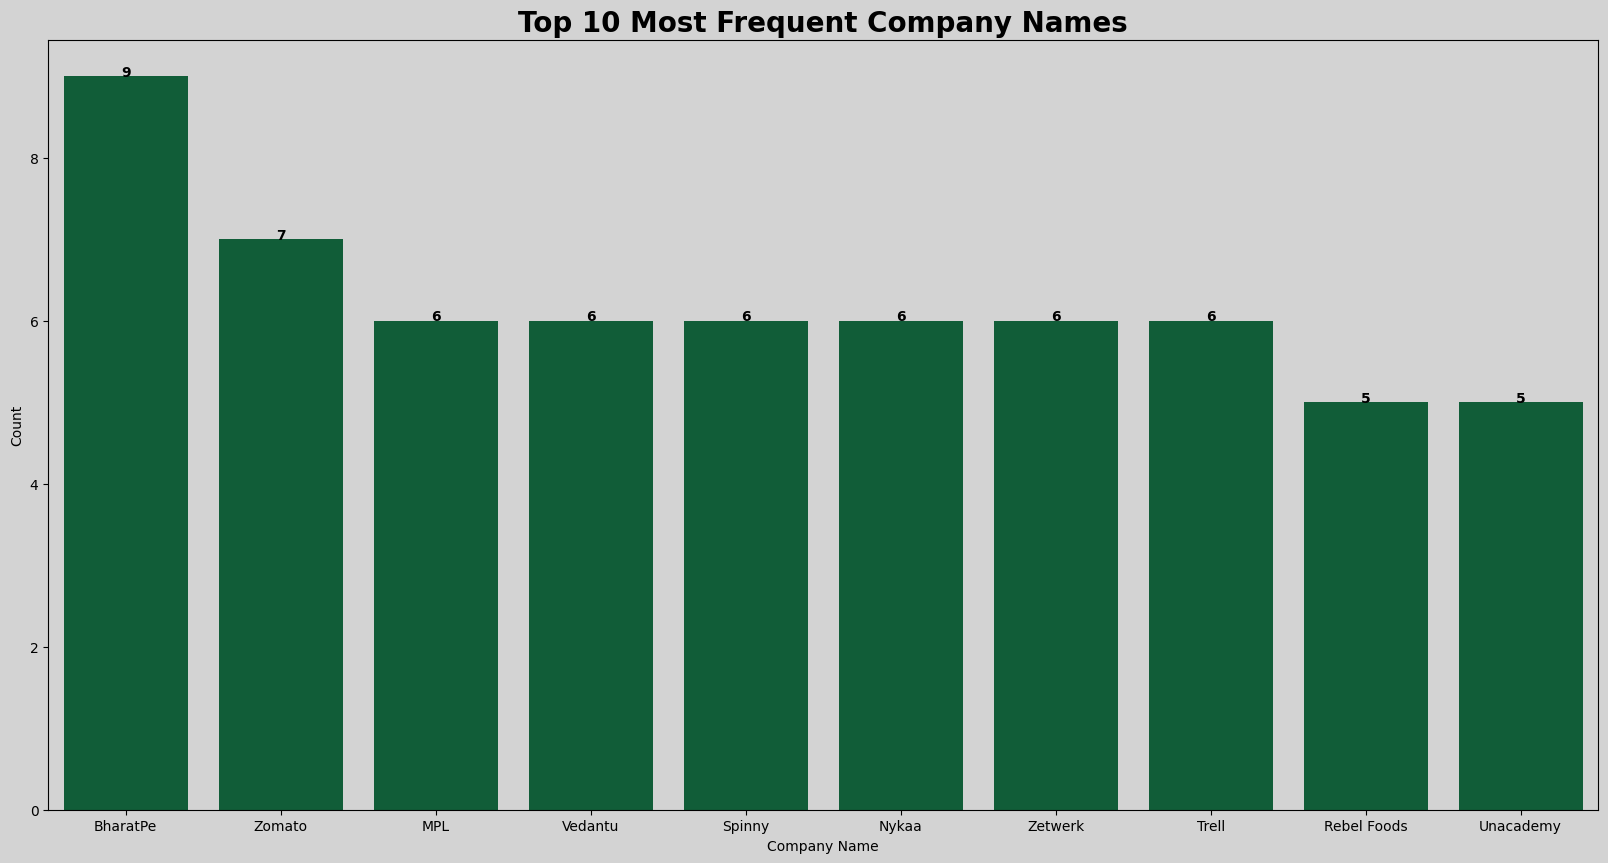

In [500]:
plot_top_values(combinedData,'Company Name',10)

summary

- It is evident from the visualization that a company called **BharatPe** stands out among Indian start-ups by securing **9 investments** from 2018 to 2021


2. Top 10 Location with more startups that received Investment from 2018-2021


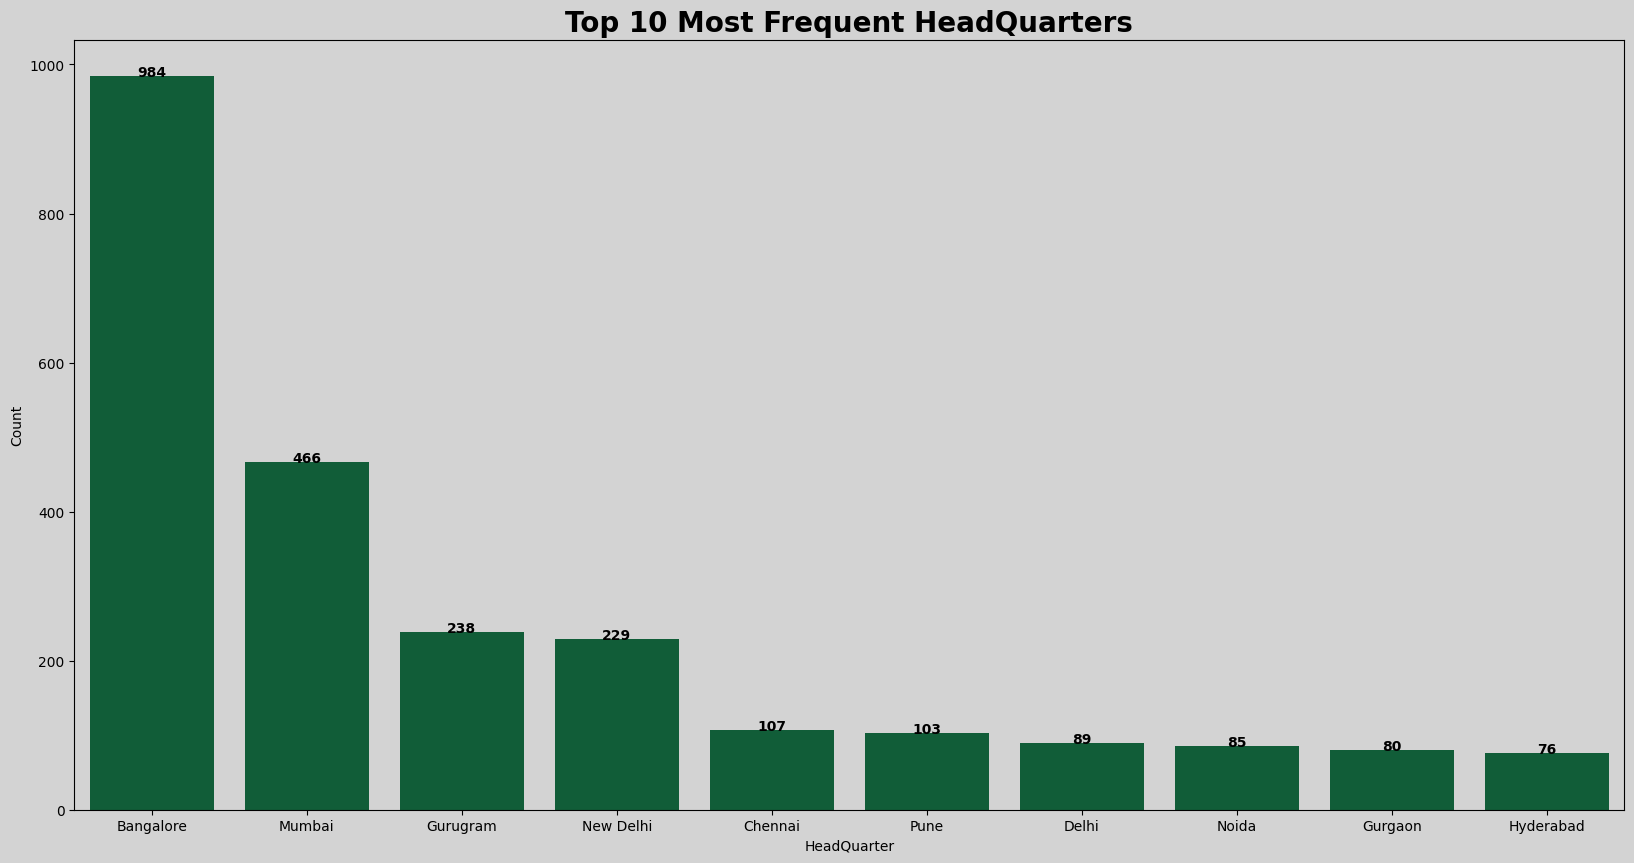

In [501]:
plot_top_values(combinedData,'HeadQuarter',10)

It is evident from the visualization that **Bangalore** is the leading location in India, with **984 start-ups** received investments from 2018 to 2021.


3. Top 10 sector with most Start Ups that received Investment in India from 2018-2021


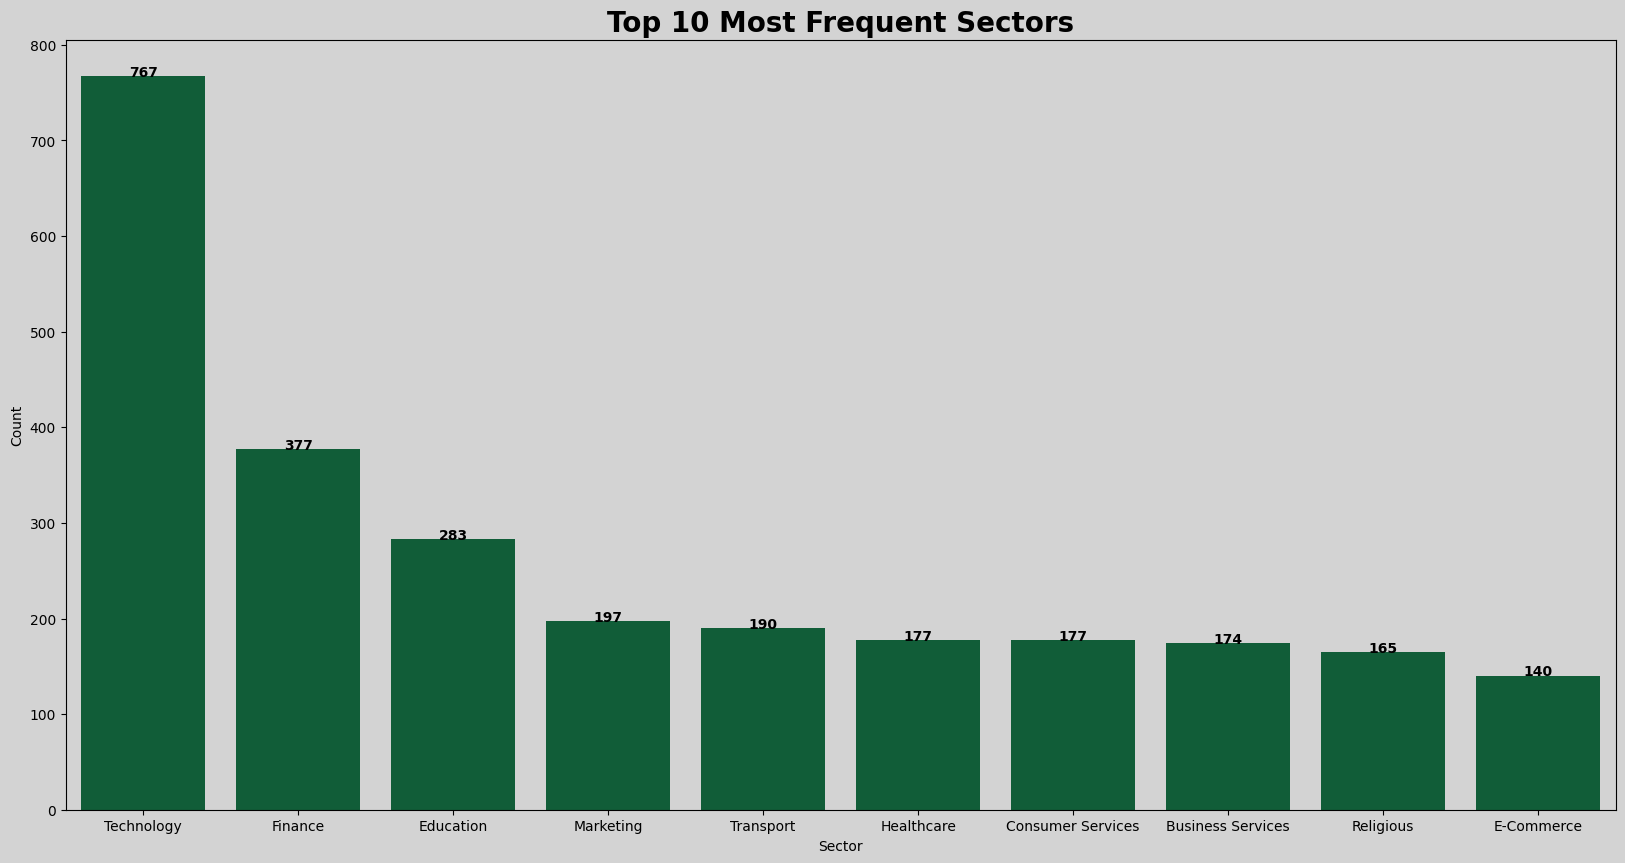

In [502]:
plot_top_values(combinedData,'Sector',10)

it is evident from the visualization that the **Technology sector** leads in investments, with \*_767 start-ups_ in this sector receiving funding in India from 2018 to 2021.


4. Top 5 Stage where startups received more Investments in India from 2018-2021


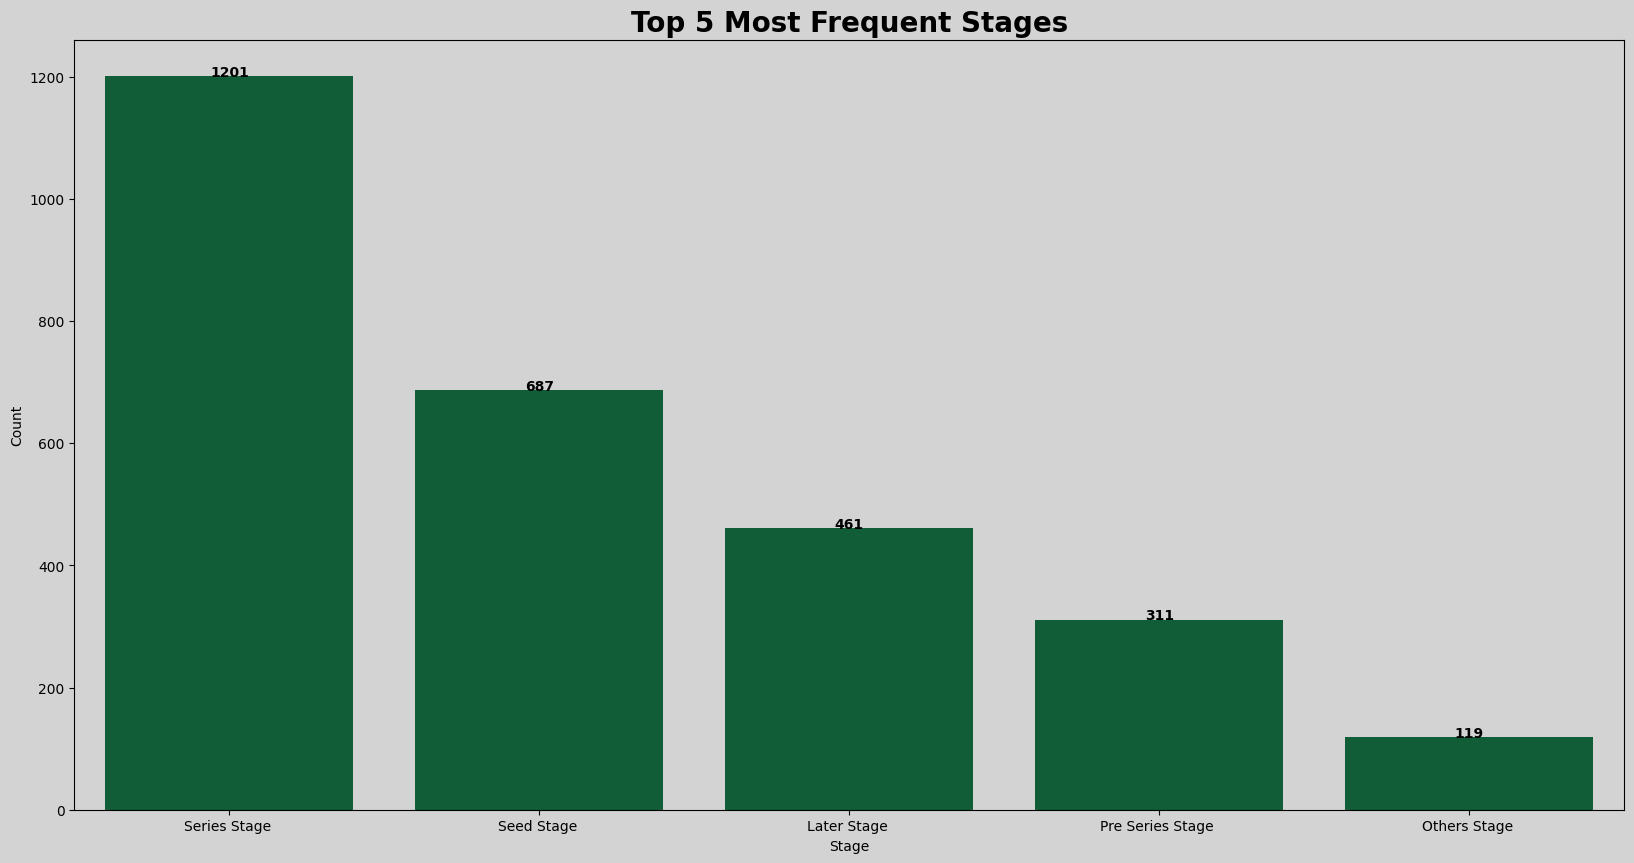

In [503]:
;plot_top_values(combinedData,'Stage',5)


It is evident from the visualization that the Series stage is the most significant stage, with 1201 Investment in India startups receiving investments at this stage from 2018 to 2021.


In [531]:
def total_investment_amount(data, amount_column='Amount($)'):
    
    data[amount_column] = pd.to_numeric(data[amount_column], errors='coerce')
    total_amount = data[amount_column].sum()
    
    total_amount = f"${total_amount:,.0f}"

    return total_amount

Total Amount Invested in Indian Start ups from 2018-2021


In [532]:
total_investment_amount(combinedData)

'$280,688,791,137'

Total Amount Invested in Indian Start ups from 2018-2021 was Approximately **$280.7 Bilions**


### **MULTIVARIATE ANALYSIS**


Multivariate Analysis: A statistical technique used to examine and interpret data involving multiple variables simultaneously to understand relationships, patterns, and interactions among them. It helps in uncovering complex dependencies and provides comprehensive insights into the data
